21:46:21 - cmdstanpy - INFO - Chain [1] start processing
21:46:31 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12604\2356880889.py:61: UserWarning: FigureCanvasAgg is non-int

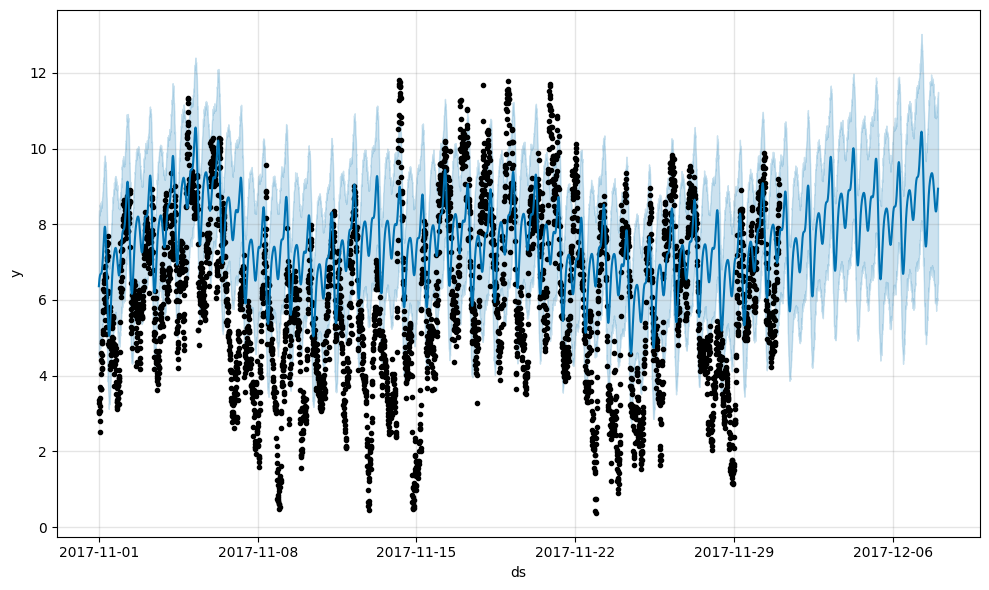

In [21]:
import pandas as pd
from prophet import Prophet

# Step 1: Load and preprocess the dataset
# Load the dataset assuming it's in a CSV file called 'wind_speed_data.csv'
df = pd.read_csv('../excels/nov-wind-ftr.csv', parse_dates=['Date/Time'])

# Drop rows with NaN values
df = df.dropna()

# Rename columns for Prophet
df.rename(columns={
    'Date/Time': 'ds',
    '100m_N Avg [m/s]': 'y',
    '100m_N Std [m/s]': '100m_N_Std',
    'Pressure [mbar]': 'Pressure',
    '98m WV [°]': 'WV_98m',
    '78m WV [°]': 'WV_78m',
    '48m WV [°]': 'WV_48m',
    'Temp 5m [°C]': 'Temp_5m',
    'Hum 5m [%]': 'Hum_5m'
}, inplace=True)

# Step 2: Prepare the data for Prophet
# Prophet requires the columns 'ds' for datetime and 'y' for the target variable
# Add additional regressors (features)
prophet_model = Prophet()
prophet_model.add_regressor('100m_N_Std')
prophet_model.add_regressor('Pressure')
prophet_model.add_regressor('WV_98m')
prophet_model.add_regressor('WV_78m')
prophet_model.add_regressor('WV_48m')
prophet_model.add_regressor('Temp_5m')
prophet_model.add_regressor('Hum_5m')

# Step 3: Fit the Prophet model
prophet_model.fit(df)

# Step 4: Make future predictions
# Create a dataframe with future dates
future = prophet_model.make_future_dataframe(periods=6*24*7, freq='10min')  # predicting for the next 7 days

# Add the same regressors to the future dataframe
# Since we are predicting for the future, we can use the last known values of the regressors or fill them with some strategy
future['100m_N_Std'] = df['100m_N_Std'].iloc[-1]
future['Pressure'] = df['Pressure'].iloc[-1]
future['WV_98m'] = df['WV_98m'].iloc[-1]
future['WV_78m'] = df['WV_78m'].iloc[-1]
future['WV_48m'] = df['WV_48m'].iloc[-1]
future['Temp_5m'] = df['Temp_5m'].iloc[-1]
future['Hum_5m'] = df['Hum_5m'].iloc[-1]

# Make predictions
forecast = prophet_model.predict(future)

# Display the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# Optional: Plot the forecast
fig = prophet_model.plot(forecast)
fig.show()


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
11:39:11 - cmdstanpy - INFO - Chain [1] start processing
11:39:24 - cmdstanpy - INFO - Chain [1] done processing


                      ds      yhat  yhat_lower  yhat_upper
5323 2017-12-07 23:10:00  8.692112    6.112551   11.175055
5324 2017-12-07 23:20:00  8.755219    5.999664   11.345358
5325 2017-12-07 23:30:00  8.818435    5.980953   11.350367
5326 2017-12-07 23:40:00  8.880420    6.244082   11.498908
5327 2017-12-07 23:50:00  8.939909    6.277731   11.581712


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


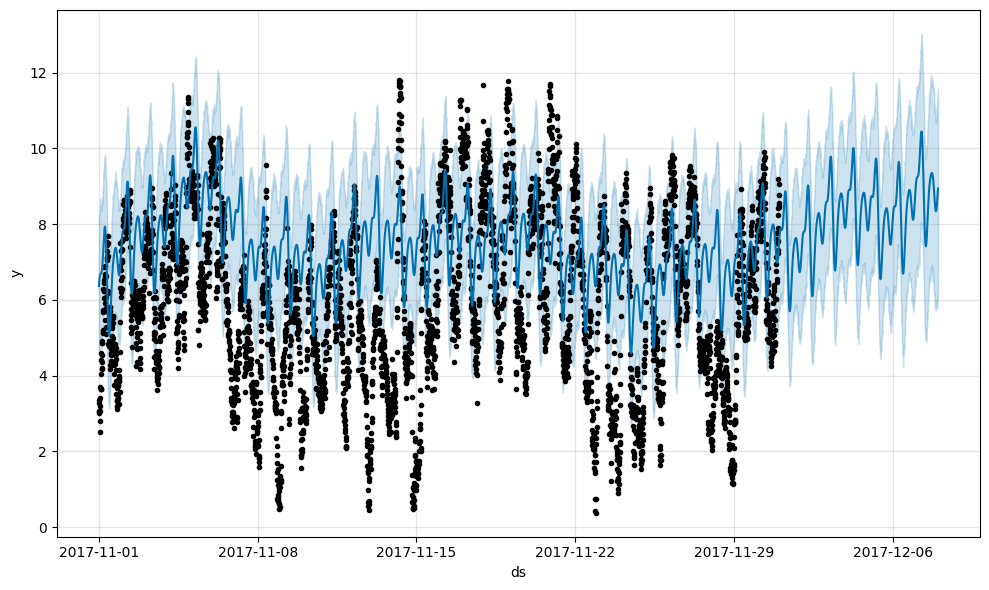

In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset
df = pd.read_csv('../excels/nov-wind-ftr.csv', parse_dates=['Date/Time'])

# Drop rows with NaN values
df = df.dropna()

# Rename columns for Prophet
df.rename(columns={
    'Date/Time': 'ds',
    '100m_N Avg [m/s]': 'y',
    '100m_N Std [m/s]': '100m_N_Std',
    'Pressure [mbar]': 'Pressure',
    '98m WV [°]': 'WV_98m',
    '78m WV [°]': 'WV_78m',
    '48m WV [°]': 'WV_48m',
    'Temp 5m [°C]': 'Temp_5m',
    'Hum 5m [%]': 'Hum_5m'
}, inplace=True)

# Step 2: Prepare the data for Prophet
prophet_model = Prophet()
prophet_model.add_regressor('100m_N_Std')
prophet_model.add_regressor('Pressure')
prophet_model.add_regressor('WV_98m')
prophet_model.add_regressor('WV_78m')
prophet_model.add_regressor('WV_48m')
prophet_model.add_regressor('Temp_5m')
prophet_model.add_regressor('Hum_5m')

# Step 3: Fit the Prophet model
prophet_model.fit(df)

# Step 4: Make future predictions
future = prophet_model.make_future_dataframe(periods=6*24*7, freq='10min')  # predicting for the next 7 days

# Add the same regressors to the future dataframe
last_row = df.iloc[-1]
future['100m_N_Std'] = last_row['100m_N_Std']
future['Pressure'] = last_row['Pressure']
future['WV_98m'] = last_row['WV_98m']
future['WV_78m'] = last_row['WV_78m']
future['WV_48m'] = last_row['WV_48m']
future['Temp_5m'] = last_row['Temp_5m']
future['Hum_5m'] = last_row['Hum_5m']

# Make predictions
forecast = prophet_model.predict(future)

# Display the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Optional: Plot the forecast
fig = prophet_model.plot(forecast)
plt.show()


In [10]:
import pandas as pd

df = pd.read_csv('../excels/2017-2018-raw.csv',encoding='latin1')

df['Date/Time'] = pd.to_datetime(df['Date/Time'])


# Convert the 'Date/Time' column to datetime
# df['Date/Time'] = pd.to_datetime(df['Date/Time'])
#, format='%d-%m-%Y %H:%M'
# Set 'Date/Time' as the index (optional, but useful for time series data)
df.set_index('Date/Time', inplace=True)

missing_before = df['100m_N Avg [m/s]'].isnull().sum()
missing_before_std = df['100m_N Std [m/s]'].isnull().sum()
missing_before_pr = df['Pressure [mbar]'].isnull().sum()
missing_before_98 = df['98m WV [°]'].isnull().sum()
missing_before_78 = df['78m WV [°]'].isnull().sum()
missing_before_48 = df['48m WV [°]'].isnull().sum()
missing_before_tmp = df['Temp 5m [°C]'].isnull().sum()
missing_before_hum = df['Hum 5m [%]'].isnull().sum()

# Interpolate missing values
df['100m_N Avg [m/s]'] = df['100m_N Avg [m/s]'].interpolate(method='linear')
df['100m_N Std [m/s]'] = df['100m_N Std [m/s]'].interpolate(method='linear')
df['Pressure [mbar]'] = df['Pressure [mbar]'].interpolate(method='linear')
df['98m WV [°]'] = df['98m WV [°]'].interpolate(method='linear')
df['78m WV [°]'] = df['78m WV [°]'].interpolate(method='linear')
df['48m WV [°]'] = df['48m WV [°]'].interpolate(method='linear')
df['Temp 5m [°C]'] = df['Temp 5m [°C]'].interpolate(method='linear')
df['Hum 5m [%]'] = df['Hum 5m [%]'].interpolate(method='linear')
# df.to_csv('north_changed.csv')

# Count missing values after interpolation
missing_after = df['100m_N Avg [m/s]'].isnull().sum()
missing_after_std = df['100m_N Std [m/s]'].isnull().sum()
missing_after_pr = df['Pressure [mbar]'].isnull().sum()
missing_after_98 = df['98m WV [°]'].isnull().sum()
missing_after_78 = df['78m WV [°]'].isnull().sum()
missing_after_48 = df['48m WV [°]'].isnull().sum()
missing_after_tmp = df['Temp 5m [°C]'].isnull().sum()
missing_after_hum = df['Hum 5m [%]'].isnull().sum()
# Calculate the number of rows affected
row_affected = missing_before - missing_after
row_affected_std = missing_before_std - missing_after_std
row_affected_pr = missing_before_pr - missing_after_pr
row_affected_98 = missing_before_98 - missing_after_98
row_affected_78 = missing_before_78 - missing_after_78
row_affected_48 = missing_before_48 - missing_after_48
row_affected_tmp = missing_before_tmp - missing_after_tmp
row_affected_hum = missing_before_hum - missing_after_hum

print(df['100m_N Avg [m/s]'])
df_reset = df.reset_index()
new_column = ['Date/Time','100m_N Avg [m/s]','100m_N Std [m/s]','Pressure [mbar]','98m WV [°]','78m WV [°]','48m WV [°]','Temp 5m [°C]','Hum 5m [%]']

new_data = df_reset[new_column].reset_index()

new_data.to_csv('../excels/2017-2018-clean.csv',index=False)

print(f'Number of rows affected by interpolation: {row_affected}')
print(f'Number of rows affected by interpolation: {row_affected_std}')
print(f'Number of rows affected by interpolation: {row_affected_pr}')
print(f'Number of rows affected by interpolation: {row_affected_98}')
print(f'Number of rows affected by interpolation: {row_affected_78}')
print(f'Number of rows affected by interpolation: {row_affected_48}')
print(f'Number of rows affected by interpolation: {row_affected_tmp}')
print(f'Number of rows affected by interpolation: {row_affected_hum}')

Date/Time
2017-11-01 00:00:00     3.285
2017-11-01 00:10:00     3.017
2017-11-01 00:20:00     3.066
2017-11-01 00:30:00     3.351
2017-11-01 00:40:00     3.039
                        ...  
2018-11-30 23:10:00     9.789
2018-11-30 23:20:00    10.054
2018-11-30 23:30:00    10.305
2018-11-30 23:40:00    10.565
2018-11-30 23:50:00    10.509
Name: 100m_N Avg [m/s], Length: 56880, dtype: float64
Number of rows affected by interpolation: 1442
Number of rows affected by interpolation: 1442
Number of rows affected by interpolation: 288
Number of rows affected by interpolation: 288
Number of rows affected by interpolation: 288
Number of rows affected by interpolation: 288
Number of rows affected by interpolation: 288
Number of rows affected by interpolation: 288


12:44:22 - cmdstanpy - INFO - Chain [1] start processing
12:47:13 - cmdstanpy - INFO - Chain [1] done processing


                       ds      yhat  yhat_lower  yhat_upper
61195 2018-12-30 23:10:00  5.869169    2.878703    8.839664
61196 2018-12-30 23:20:00  5.859773    2.840780    8.440958
61197 2018-12-30 23:30:00  5.849498    2.848529    8.676229
61198 2018-12-30 23:40:00  5.837875    3.078686    8.636710
61199 2018-12-30 23:50:00  5.824470    2.882269    8.493780


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


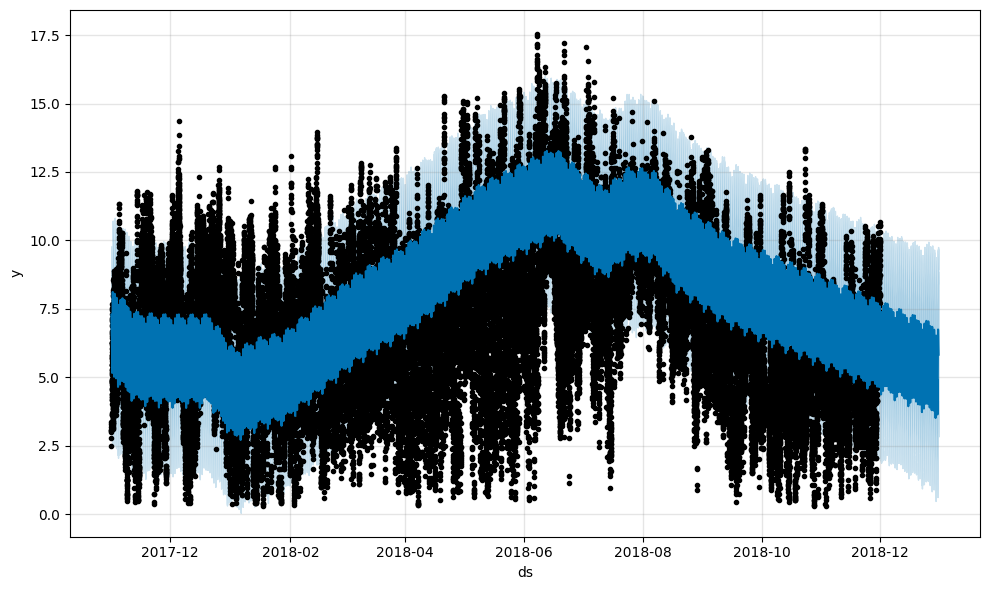

In [11]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset
df = pd.read_csv('../excels/2017-2018-clean.csv', parse_dates=['Date/Time'])

# Drop rows with NaN values
df = df.dropna()

# Rename columns for Prophet
df.rename(columns={
    'Date/Time': 'ds',
    '100m_N Avg [m/s]': 'y',
    '100m_N Std [m/s]': '100m_N_Std',
    'Pressure [mbar]': 'Pressure',
    '98m WV [°]': 'WV_98m',
    '78m WV [°]': 'WV_78m',
    '48m WV [°]': 'WV_48m',
    'Temp 5m [°C]': 'Temp_5m',
    'Hum 5m [%]': 'Hum_5m'
}, inplace=True)

# Step 2: Prepare the data for Prophet
prophet_model = Prophet()
prophet_model.add_regressor('100m_N_Std')
prophet_model.add_regressor('Pressure')
prophet_model.add_regressor('WV_98m')
prophet_model.add_regressor('WV_78m')
prophet_model.add_regressor('WV_48m')
prophet_model.add_regressor('Temp_5m')
prophet_model.add_regressor('Hum_5m')

# Step 3: Fit the Prophet model
prophet_model.fit(df)

# Step 4: Make future predictions
# Create a dataframe with future dates for the next 30 days
future = prophet_model.make_future_dataframe(periods=6*24*30, freq='10min')  # predicting for the next 30 days

# Add the same regressors to the future dataframe
last_row = df.iloc[-1]
future['100m_N_Std'] = last_row['100m_N_Std']
future['Pressure'] = last_row['Pressure']
future['WV_98m'] = last_row['WV_98m']
future['WV_78m'] = last_row['WV_78m']
future['WV_48m'] = last_row['WV_48m']
future['Temp_5m'] = last_row['Temp_5m']
future['Hum_5m'] = last_row['Hum_5m']

# Make predictions
forecast = prophet_model.predict(future)

# Display the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Optional: Plot the forecast
fig = prophet_model.plot(forecast)
plt.show()


In [ ]:
pip install nbformat

In [3]:
import pandas as pd
from prophet import Prophet
import plotly.graph_objects as go
import plotly.offline as py

# Step 1: Load and preprocess the dataset
df = pd.read_csv('../excels/2017-2018-clean.csv', parse_dates=['Date/Time'])

# Drop rows with NaN values
df = df.dropna()

# Rename columns for Prophet
df.rename(columns={
    'Date/Time': 'ds',
    '100m_N Avg [m/s]': 'y',
    '100m_N Std [m/s]': '100m_N_Std',
    'Pressure [mbar]': 'Pressure',
    '98m WV [°]': 'WV_98m',
    '78m WV [°]': 'WV_78m',
    '48m WV [°]': 'WV_48m',
    'Temp 5m [°C]': 'Temp_5m',
    'Hum 5m [%]': 'Hum_5m'
}, inplace=True)

# Step 2: Prepare the data for Prophet
prophet_model = Prophet()
prophet_model.add_regressor('100m_N_Std')
prophet_model.add_regressor('Pressure')
prophet_model.add_regressor('WV_98m')
prophet_model.add_regressor('WV_78m')
prophet_model.add_regressor('WV_48m')
prophet_model.add_regressor('Temp_5m')
prophet_model.add_regressor('Hum_5m')

# Step 3: Fit the Prophet model
prophet_model.fit(df)

# Step 4: Make future predictions
# Create a dataframe with future dates for the next 30 days
future = prophet_model.make_future_dataframe(periods=6*24*30, freq='10min')  # predicting for the next 30 days

# Add the same regressors to the future dataframe
last_row = df.iloc[-1]
future['100m_N_Std'] = last_row['100m_N_Std']
future['Pressure'] = last_row['Pressure']
future['WV_98m'] = last_row['WV_98m']
future['WV_78m'] = last_row['WV_78m']
future['WV_48m'] = last_row['WV_48m']
future['Temp_5m'] = last_row['Temp_5m']
future['Hum_5m'] = last_row['Hum_5m']

# Make predictions
forecast = prophet_model.predict(future)

# Display the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Create an interactive plot with Plotly
fig = go.Figure()

# Add the actual data points
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='markers', name='Actual'))

# Add the forecasted data points
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast'))

# Add the confidence intervals
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['yhat_upper'], mode='lines', fill=None,
    line_color='lightgrey', name='Upper CI'
))
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['yhat_lower'], mode='lines', fill='tonexty',
    fillcolor='rgba(68, 68, 68, 0.3)', line_color='lightgrey', name='Lower CI'
))

# Add dropdown to filter by month
months = pd.date_range(start='2017-11-01', end='2018-11-01', freq='MS').strftime("%B-%Y").tolist()
month_values = pd.date_range(start='2017-11-01', end='2018-11-01', freq='MS').strftime("%Y-%m").tolist()

dropdown_buttons = [
    {'label': 'All Data', 'method': 'update', 'args': [{'visible': [True, True, True, True]}, {'title': 'All Data'}]}
]

for month, month_value in zip(months, month_values):
    visible = [False] * len(fig.data)
    indices = forecast['ds'].dt.strftime("%Y-%m") == month_value
    visible[0] = (df['ds'].dt.strftime("%Y-%m") == month_value).any()  # Actual data
    visible[1] = indices.any()  # Forecast
    visible[2] = indices.any()  # Upper CI
    visible[3] = indices.any()  # Lower CI
    dropdown_buttons.append(
        {'label': month, 'method': 'update', 'args': [{'visible': visible}, {'title': month}]}
    )

fig.update_layout(
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'showactive': True,
    }],
    title='Wind Speed Forecast',
    xaxis_title='Date',
    yaxis_title='Wind Speed (m/s)'
)

# Render the plot in a web browser
py.plot(fig, filename='wind_speed_forecast.html')


16:16:19 - cmdstanpy - INFO - Chain [1] start processing
16:21:52 - cmdstanpy - INFO - Chain [1] done processing


                       ds      yhat  yhat_lower  yhat_upper
61195 2018-12-30 23:10:00  5.869169    2.865718    8.688448
61196 2018-12-30 23:20:00  5.859773    2.746019    8.721498
61197 2018-12-30 23:30:00  5.849498    2.909867    8.849691
61198 2018-12-30 23:40:00  5.837875    2.999065    8.615224
61199 2018-12-30 23:50:00  5.824470    2.734732    8.567873


'wind_speed_forecast.html'

16:28:46 - cmdstanpy - INFO - Chain [1] start processing
16:32:41 - cmdstanpy - INFO - Chain [1] done processing


                       ds      yhat  yhat_lower  yhat_upper
61195 2018-12-30 23:10:00  5.869169    3.250443    8.719281
61196 2018-12-30 23:20:00  5.859773    2.946530    8.785993
61197 2018-12-30 23:30:00  5.849498    3.272485    8.844052
61198 2018-12-30 23:40:00  5.837875    2.965732    8.745135
61199 2018-12-30 23:50:00  5.824470    2.870526    8.582776


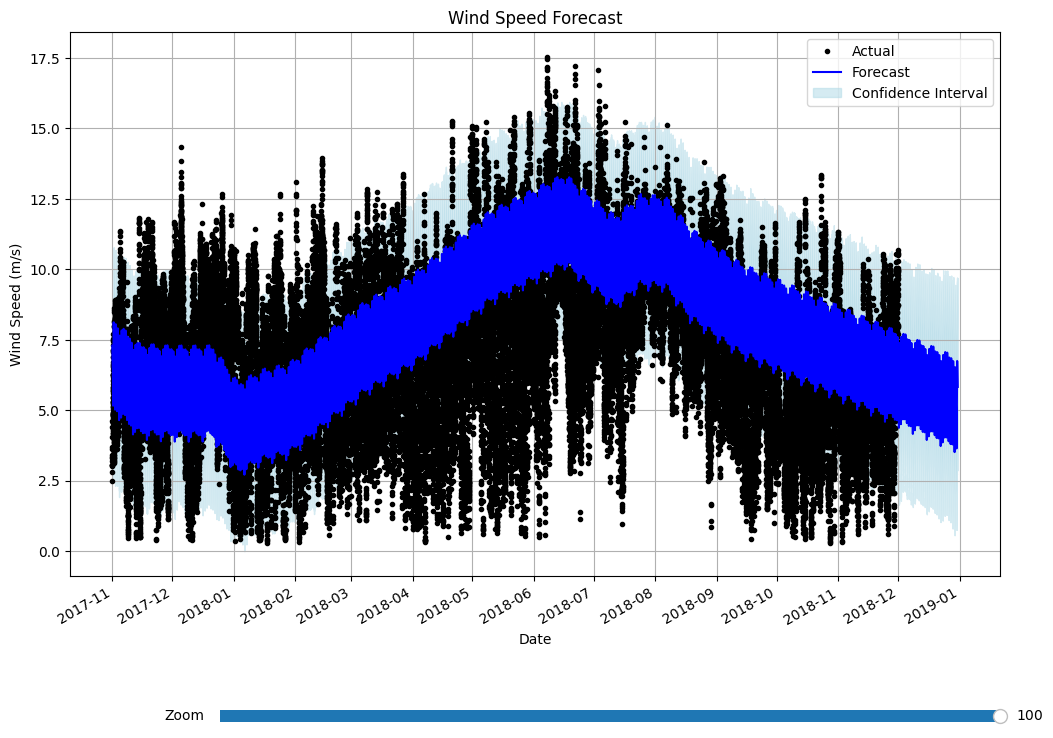

In [4]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.widgets import Slider

# Step 1: Load and preprocess the dataset
df = pd.read_csv('../excels/2017-2018-clean.csv', parse_dates=['Date/Time'])

# Drop rows with NaN values
df = df.dropna()

# Rename columns for Prophet
df.rename(columns={
    'Date/Time': 'ds',
    '100m_N Avg [m/s]': 'y',
    '100m_N Std [m/s]': '100m_N_Std',
    'Pressure [mbar]': 'Pressure',
    '98m WV [°]': 'WV_98m',
    '78m WV [°]': 'WV_78m',
    '48m WV [°]': 'WV_48m',
    'Temp 5m [°C]': 'Temp_5m',
    'Hum 5m [%]': 'Hum_5m'
}, inplace=True)

# Step 2: Prepare the data for Prophet
prophet_model = Prophet()
prophet_model.add_regressor('100m_N_Std')
prophet_model.add_regressor('Pressure')
prophet_model.add_regressor('WV_98m')
prophet_model.add_regressor('WV_78m')
prophet_model.add_regressor('WV_48m')
prophet_model.add_regressor('Temp_5m')
prophet_model.add_regressor('Hum_5m')

# Step 3: Fit the Prophet model
prophet_model.fit(df)

# Step 4: Make future predictions
# Create a dataframe with future dates for the next 30 days
future = prophet_model.make_future_dataframe(periods=6*24*30, freq='10min')  # predicting for the next 30 days

# Add the same regressors to the future dataframe
last_row = df.iloc[-1]
future['100m_N_Std'] = last_row['100m_N_Std']
future['Pressure'] = last_row['Pressure']
future['WV_98m'] = last_row['WV_98m']
future['WV_78m'] = last_row['WV_78m']
future['WV_48m'] = last_row['WV_48m']
future['Temp_5m'] = last_row['Temp_5m']
future['Hum_5m'] = last_row['Hum_5m']

# Make predictions
forecast = prophet_model.predict(future)

# Display the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Create an interactive plot with Matplotlib
fig, ax = plt.subplots(figsize=(12, 8))

# Plot actual data points
ax.plot(df['ds'], df['y'], 'k.', label='Actual')

# Plot forecasted data points
ax.plot(forecast['ds'], forecast['yhat'], 'b-', label='Forecast')

# Plot confidence intervals
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightblue', alpha=0.5, label='Confidence Interval')

# Format the plot
ax.set_title('Wind Speed Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Wind Speed (m/s)')
ax.legend()
ax.grid(True)

# Improve x-axis date formatting
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
fig.autofmt_xdate()

# Add interactive elements
ax_zoom = plt.axes([0.25, 0.01, 0.65, 0.03], facecolor='lightgoldenrodyellow')
slider_zoom = Slider(ax_zoom, 'Zoom', 1, 100, valinit=100, valstep=1)

def update(val):
    zoom = slider_zoom.val
    ax.set_xlim([df['ds'].min(), df['ds'].max() + pd.Timedelta(days=30)/zoom])
    fig.canvas.draw_idle()

slider_zoom.on_changed(update)

# Show the plot
plt.show()


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
19:49:32 - cmdstanpy - INFO - Chain [1] start processing
19:52:20 - cmdstanpy - INFO - Chain [1] done processing


                       ds      yhat  yhat_lower  yhat_upper
61195 2018-12-30 23:10:00  5.869169    3.217008    8.701363
61196 2018-12-30 23:20:00  5.859773    3.240603    8.845718
61197 2018-12-30 23:30:00  5.849498    3.108323    8.662934
61198 2018-12-30 23:40:00  5.837875    2.979636    8.671106
61199 2018-12-30 23:50:00  5.824470    2.889333    8.675599


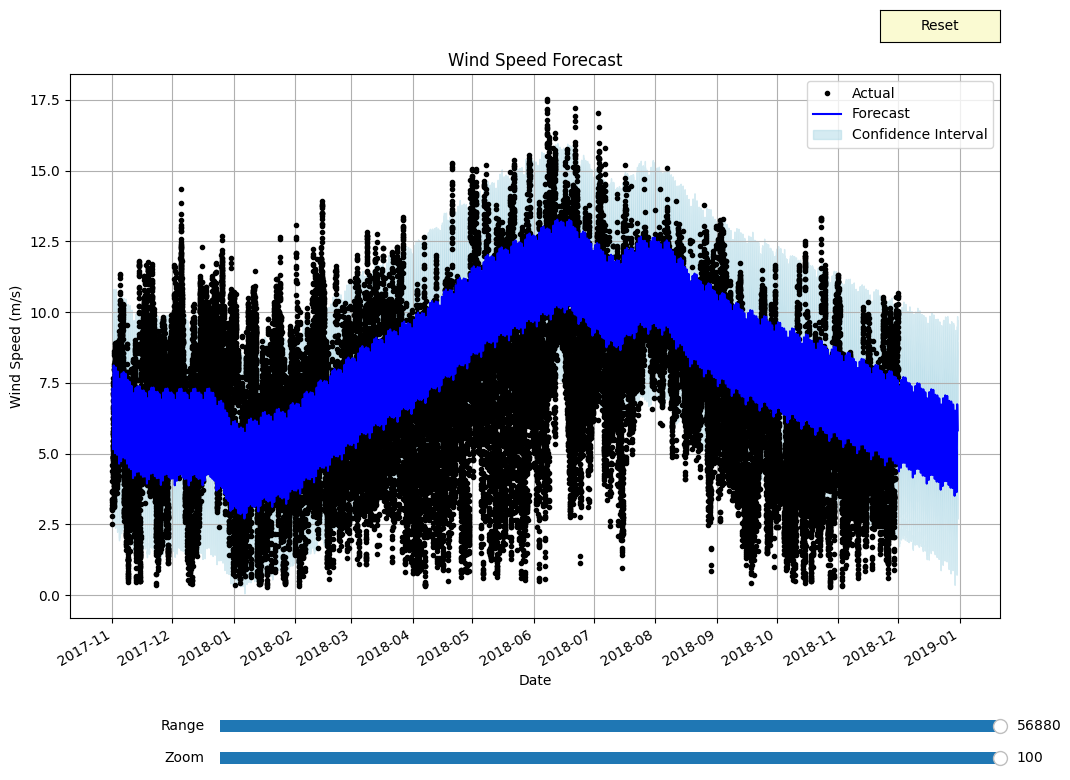

In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.widgets import Slider, Button

# Step 1: Load and preprocess the dataset
df = pd.read_csv('../excels/2017-2018-clean.csv', parse_dates=['Date/Time'])

# Drop rows with NaN values
df = df.dropna()

# Rename columns for Prophet
df.rename(columns={
    'Date/Time': 'ds',
    '100m_N Avg [m/s]': 'y',
    '100m_N Std [m/s]': '100m_N_Std',
    'Pressure [mbar]': 'Pressure',
    '98m WV [°]': 'WV_98m',
    '78m WV [°]': 'WV_78m',
    '48m WV [°]': 'WV_48m',
    'Temp 5m [°C]': 'Temp_5m',
    'Hum 5m [%]': 'Hum_5m'
}, inplace=True)

# Step 2: Prepare the data for Prophet
prophet_model = Prophet()
prophet_model.add_regressor('100m_N_Std')
prophet_model.add_regressor('Pressure')
prophet_model.add_regressor('WV_98m')
prophet_model.add_regressor('WV_78m')
prophet_model.add_regressor('WV_48m')
prophet_model.add_regressor('Temp_5m')
prophet_model.add_regressor('Hum_5m')

# Step 3: Fit the Prophet model
prophet_model.fit(df)

# Step 4: Make future predictions
# Create a dataframe with future dates for the next 30 days
future = prophet_model.make_future_dataframe(periods=6*24*30, freq='10min')  # predicting for the next 30 days

# Add the same regressors to the future dataframe
last_row = df.iloc[-1]
future['100m_N_Std'] = last_row['100m_N_Std']
future['Pressure'] = last_row['Pressure']
future['WV_98m'] = last_row['WV_98m']
future['WV_78m'] = last_row['WV_78m']
future['WV_48m'] = last_row['WV_48m']
future['Temp_5m'] = last_row['Temp_5m']
future['Hum_5m'] = last_row['Hum_5m']

# Make predictions
forecast = prophet_model.predict(future)

# Display the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Create an interactive plot with Matplotlib
fig, ax = plt.subplots(figsize=(12, 8))

# Plot actual data points
ax.plot(df['ds'], df['y'], 'k.', label='Actual')

# Plot forecasted data points
ax.plot(forecast['ds'], forecast['yhat'], 'b-', label='Forecast')

# Plot confidence intervals
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightblue', alpha=0.5, label='Confidence Interval')

# Format the plot
ax.set_title('Wind Speed Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Wind Speed (m/s)')
ax.legend()
ax.grid(True)

# Improve x-axis date formatting
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
fig.autofmt_xdate()

# Add interactive elements
ax_zoom = plt.axes([0.25, 0.01, 0.65, 0.03], facecolor='lightgoldenrodyellow')
slider_zoom = Slider(ax_zoom, 'Zoom', 1, 100, valinit=100, valstep=1)

ax_range = plt.axes([0.25, 0.05, 0.65, 0.03], facecolor='lightgoldenrodyellow')
slider_range = Slider(ax_range, 'Range', 0, len(df), valinit=len(df), valstep=1)

reset_ax = plt.axes([0.8, 0.92, 0.1, 0.04])
button_reset = Button(reset_ax, 'Reset', color='lightgoldenrodyellow', hovercolor='0.975')

def update(val):
    zoom = slider_zoom.val
    range_val = slider_range.val
    end_date = df['ds'].iloc[int(range_val)]
    ax.set_xlim([df['ds'].min(), end_date + pd.Timedelta(days=30)/zoom])
    fig.canvas.draw_idle()

slider_zoom.on_changed(update)
slider_range.on_changed(update)

def reset(event):
    slider_zoom.reset()
    slider_range.reset()

button_reset.on_clicked(reset)

# Show the plot
plt.show()


20:00:40 - cmdstanpy - INFO - Chain [1] start processing
20:03:12 - cmdstanpy - INFO - Chain [1] done processing


                       ds      yhat  yhat_lower  yhat_upper
61195 2018-12-30 23:10:00  5.869169    2.877597    8.739896
61196 2018-12-30 23:20:00  5.859773    3.097590    8.856087
61197 2018-12-30 23:30:00  5.849498    3.117596    8.581693
61198 2018-12-30 23:40:00  5.837875    2.822429    8.731009
61199 2018-12-30 23:50:00  5.824470    3.122179    8.621598


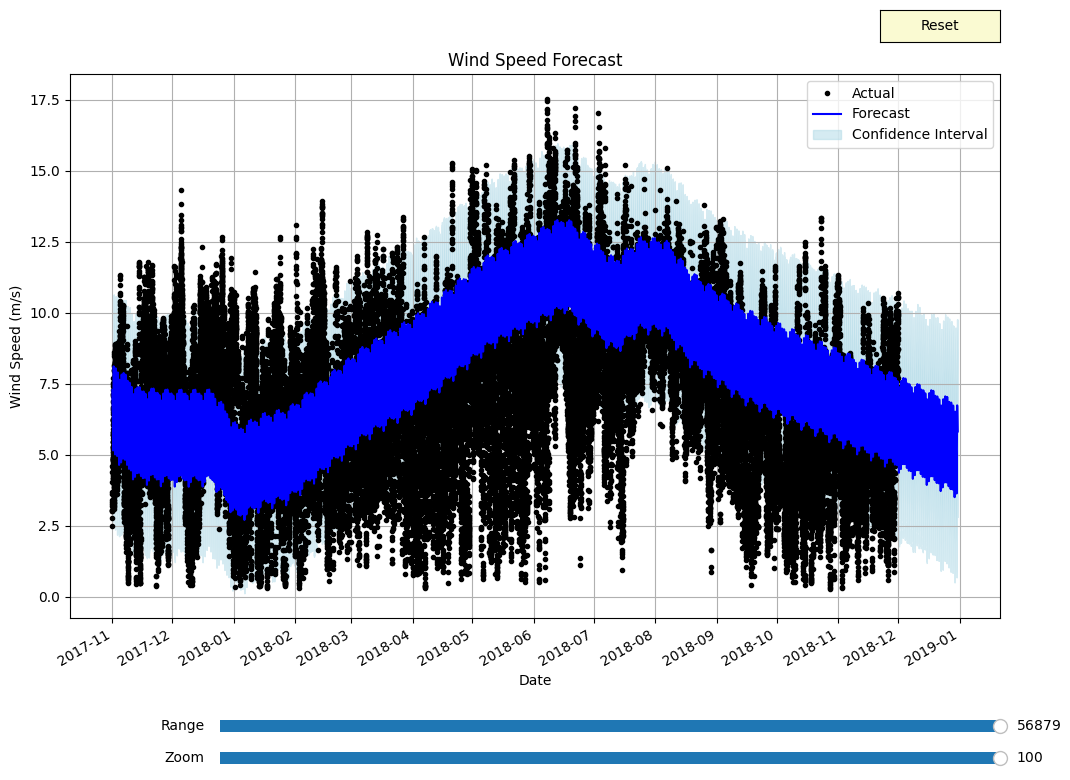

In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.widgets import Slider, Button

# Step 1: Load and preprocess the dataset
df = pd.read_csv('../excels/2017-2018-clean.csv', parse_dates=['Date/Time'])

# Drop rows with NaN values
df = df.dropna()

# Rename columns for Prophet
df.rename(columns={
    'Date/Time': 'ds',
    '100m_N Avg [m/s]': 'y',
    '100m_N Std [m/s]': '100m_N_Std',
    'Pressure [mbar]': 'Pressure',
    '98m WV [°]': 'WV_98m',
    '78m WV [°]': 'WV_78m',
    '48m WV [°]': 'WV_48m',
    'Temp 5m [°C]': 'Temp_5m',
    'Hum 5m [%]': 'Hum_5m'
}, inplace=True)

# Step 2: Prepare the data for Prophet
prophet_model = Prophet()
prophet_model.add_regressor('100m_N_Std')
prophet_model.add_regressor('Pressure')
prophet_model.add_regressor('WV_98m')
prophet_model.add_regressor('WV_78m')
prophet_model.add_regressor('WV_48m')
prophet_model.add_regressor('Temp_5m')
prophet_model.add_regressor('Hum_5m')

# Step 3: Fit the Prophet model
prophet_model.fit(df)

# Step 4: Make future predictions
# Create a dataframe with future dates for the next 30 days
future = prophet_model.make_future_dataframe(periods=6*24*30, freq='10min')  # predicting for the next 30 days

# Add the same regressors to the future dataframe
last_row = df.iloc[-1]
future['100m_N_Std'] = last_row['100m_N_Std']
future['Pressure'] = last_row['Pressure']
future['WV_98m'] = last_row['WV_98m']
future['WV_78m'] = last_row['WV_78m']
future['WV_48m'] = last_row['WV_48m']
future['Temp_5m'] = last_row['Temp_5m']
future['Hum_5m'] = last_row['Hum_5m']

# Make predictions
forecast = prophet_model.predict(future)

# Display the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Create an interactive plot with Matplotlib
fig, ax = plt.subplots(figsize=(12, 8))

# Plot actual data points
ax.plot(df['ds'], df['y'], 'k.', label='Actual')

# Plot forecasted data points
ax.plot(forecast['ds'], forecast['yhat'], 'b-', label='Forecast')

# Plot confidence intervals
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightblue', alpha=0.5, label='Confidence Interval')

# Format the plot
ax.set_title('Wind Speed Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Wind Speed (m/s)')
ax.legend()
ax.grid(True)

# Improve x-axis date formatting
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
fig.autofmt_xdate()

# Add interactive elements
ax_zoom = plt.axes([0.25, 0.01, 0.65, 0.03], facecolor='lightgoldenrodyellow')
slider_zoom = Slider(ax_zoom, 'Zoom', 1, 100, valinit=100, valstep=1)

ax_range = plt.axes([0.25, 0.05, 0.65, 0.03], facecolor='lightgoldenrodyellow')
slider_range = Slider(ax_range, 'Range', 0, len(df)-1, valinit=len(df)-1, valstep=1)

reset_ax = plt.axes([0.8, 0.92, 0.1, 0.04])
button_reset = Button(reset_ax, 'Reset', color='lightgoldenrodyellow', hovercolor='0.975')

def update(val):
    zoom = slider_zoom.val
    range_val = slider_range.val
    end_date = df['ds'].iloc[int(range_val)]
    ax.set_xlim([df['ds'].min(), end_date + pd.Timedelta(days=30/zoom)])
    fig.canvas.draw_idle()

slider_zoom.on_changed(update)
slider_range.on_changed(update)

def reset(event):
    slider_zoom.reset()
    slider_range.reset()

button_reset.on_clicked(reset)

# Show the plot
plt.show()


In [1]:
import pandas as pd
from prophet import Prophet
import plotly.graph_objs as go
import plotly.express as px

# Step 1: Load and preprocess the dataset
df = pd.read_csv('../excels/2017-2018-clean.csv', parse_dates=['Date/Time'])

# Drop rows with NaN values
df = df.dropna()

# Rename columns for Prophet
df.rename(columns={
    'Date/Time': 'ds',
    '100m_N Avg [m/s]': 'y',
    '100m_N Std [m/s]': '100m_N_Std',
    'Pressure [mbar]': 'Pressure',
    '98m WV [°]': 'WV_98m',
    '78m WV [°]': 'WV_78m',
    '48m WV [°]': 'WV_48m',
    'Temp 5m [°C]': 'Temp_5m',
    'Hum 5m [%]': 'Hum_5m'
}, inplace=True)

# Step 2: Prepare the data for Prophet
prophet_model = Prophet()
prophet_model.add_regressor('100m_N_Std')
prophet_model.add_regressor('Pressure')
prophet_model.add_regressor('WV_98m')
prophet_model.add_regressor('WV_78m')
prophet_model.add_regressor('WV_48m')
prophet_model.add_regressor('Temp_5m')
prophet_model.add_regressor('Hum_5m')

# Step 3: Fit the Prophet model
prophet_model.fit(df)

# Step 4: Make future predictions
# Create a dataframe with future dates for the next 30 days
future = prophet_model.make_future_dataframe(periods=6*24*30, freq='10min')  # predicting for the next 30 days

# Add the same regressors to the future dataframe
last_row = df.iloc[-1]
future['100m_N_Std'] = last_row['100m_N_Std']
future['Pressure'] = last_row['Pressure']
future['WV_98m'] = last_row['WV_98m']
future['WV_78m'] = last_row['WV_78m']
future['WV_48m'] = last_row['WV_48m']
future['Temp_5m'] = last_row['Temp_5m']
future['Hum_5m'] = last_row['Hum_5m']

# Make predictions
forecast = prophet_model.predict(future)

# Create interactive plot with Plotly
fig = go.Figure()

# Add actual data trace
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='markers', name='Actual', marker=dict(color='black')))

# Add forecasted data trace
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast', line=dict(color='blue')))

# Add confidence interval traces
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], mode='lines', name='Upper Confidence Interval',
                         line=dict(color='lightblue'), fill=None))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], mode='lines', name='Lower Confidence Interval',
                         line=dict(color='lightblue'), fill='tonexty', fillcolor='rgba(173, 216, 230, 0.2)'))

# Update layout for interactivity
fig.update_layout(
    title='Wind Speed Forecast',
    xaxis_title='Date',
    yaxis_title='Wind Speed (m/s)',
    xaxis_rangeslider_visible=True,
    xaxis_rangeselector=dict(
        buttons=list([
            dict(count=1, label='1m', step='month', stepmode='backward'),
            dict(count=6, label='6m', step='month', stepmode='backward'),
            dict(count=1, label='YTD', step='year', stepmode='todate'),
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    ),
    legend=dict(x=0.01, y=0.99),
    hovermode='x'
)

# Show the plot
fig.show()


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
20:35:34 - cmdstanpy - INFO - Chain [1] start processing
20:38:17 - cmdstanpy - INFO - Chain [1] done processing


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [2]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import plotly.graph_objs as go

# Load and preprocess the training dataset
train_df = pd.read_csv('../excels/2017-2018-clean.csv', parse_dates=['Date/Time'])

# Drop rows with NaN values
train_df = train_df.dropna()

# Rename columns for Prophet
train_df.rename(columns={
    'Date/Time': 'ds',
    '100m_N Avg [m/s]': 'y',
    '100m_N Std [m/s]': '100m_N_Std',
    'Pressure [mbar]': 'Pressure',
    '98m WV [°]': 'WV_98m',
    '78m WV [°]': 'WV_78m',
    '48m WV [°]': 'WV_48m',
    'Temp 5m [°C]': 'Temp_5m',
    'Hum 5m [%]': 'Hum_5m'
}, inplace=True)

# Prepare the data for Prophet
prophet_model = Prophet()
# prophet_model.add_regressor('100m_N_Std')
prophet_model.add_regressor('Pressure')
prophet_model.add_regressor('WV_98m')
prophet_model.add_regressor('WV_78m')
prophet_model.add_regressor('WV_48m')
prophet_model.add_regressor('Temp_5m')
prophet_model.add_regressor('Hum_5m')

# Fit the Prophet model
prophet_model.fit(train_df)

# Load and preprocess the testing dataset
test_df = pd.read_csv('../excels/2018-2019-clean.csv', parse_dates=['Date/Time'])

# Drop rows with NaN values
test_df = test_df.dropna()

# Rename columns for Prophet
test_df.rename(columns={
    'Date/Time': 'ds',
    '100m_N Avg [m/s]': 'y',
    'Pressure 5m [mbar]': 'Pressure',
    '98m WV [°]': 'WV_98m',
    '78m WV [°]': 'WV_78m',
    '48m WV [°]': 'WV_48m',
    'Temp 5m [°C]': 'Temp_5m',
    'Hum 5m': 'Hum_5m'
}, inplace=True)

# Make predictions on the test dataset
forecast_test = prophet_model.predict(test_df)

# Calculate accuracy metrics
y_true = test_df['y']
y_pred = forecast_test['yhat']

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_true, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-Squared: {r_squared}")

# Create interactive plot with Plotly
fig = go.Figure()

# Add actual data trace for training and testing datasets
fig.add_trace(go.Scatter(x=train_df['ds'], y=train_df['y'], mode='markers', name='Actual Train', marker=dict(color='black')))
fig.add_trace(go.Scatter(x=test_df['ds'], y=test_df['y'], mode='markers', name='Actual Test', marker=dict(color='red')))

# Add forecasted data trace for training and testing datasets
fig.add_trace(go.Scatter(x=forecast_test['ds'], y=forecast_test['yhat'], mode='lines', name='Forecast Test', line=dict(color='green')))

# Add confidence interval traces for training and testing datasets
fig.add_trace(go.Scatter(x=forecast_test['ds'], y=forecast_test['yhat_upper'], mode='lines', name='Upper Confidence Interval Test',
                         line=dict(color='lightgreen'), fill=None))
fig.add_trace(go.Scatter(x=forecast_test['ds'], y=forecast_test['yhat_lower'], mode='lines', name='Lower Confidence Interval Test',
                         line=dict(color='lightgreen'), fill='tonexty', fillcolor='rgba(144, 238, 144, 0.2)'))

# Update layout for interactivity
fig.update_layout(
    title='Wind Speed Forecast',
    xaxis_title='Date',
    yaxis_title='Wind Speed (m/s)',
    xaxis_rangeslider_visible=True,
    xaxis_rangeselector=dict(
        buttons=list([
            dict(count=1, label='1m', step='month', stepmode='backward'),
            dict(count=6, label='6m', step='month', stepmode='backward'),
            dict(count=1, label='YTD', step='year', stepmode='todate'),
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    ),
    legend=dict(x=0.01, y=0.99),
    hovermode='x'
)

# Show the plot
fig.show()


22:16:36 - cmdstanpy - INFO - Chain [1] start processing
22:19:43 - cmdstanpy - INFO - Chain [1] done processing


MAE: 12.195172523235705
MSE: 328.2889821802127
RMSE: 18.11874670555921
R-Squared: -38.248283305106675


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import plotly.graph_objs as go

# Load and preprocess the training dataset
train_df = pd.read_csv('../excels/2017-2018-clean.csv', parse_dates=['Date/Time'])

# Drop rows with NaN values
train_df = train_df.dropna()

# Rename columns for Prophet
train_df.rename(columns={
    'Date/Time': 'ds',
    '100m_N Avg [m/s]': 'y',
    '100m_N Std [m/s]': '100m_N_Std',
    'Pressure [mbar]': 'Pressure',
    '98m WV [°]': 'WV_98m',
    '78m WV [°]': 'WV_78m',
    '48m WV [°]': 'WV_48m',
    'Temp 5m [°C]': 'Temp_5m',
    'Hum 5m [%]': 'Hum_5m'
}, inplace=True)

# Prepare the data for Prophet
prophet_model = Prophet()
# prophet_model.add_regressor('100m_N_Std')
prophet_model.add_regressor('Pressure')
prophet_model.add_regressor('WV_98m')
prophet_model.add_regressor('WV_78m')
prophet_model.add_regressor('WV_48m')
prophet_model.add_regressor('Temp_5m')
prophet_model.add_regressor('Hum_5m')

# Fit the Prophet model
prophet_model.fit(train_df)

# Load and preprocess the testing dataset
test_df = pd.read_csv('../excels/2017-2018-clean.csv', parse_dates=['Date/Time'])

# Drop rows with NaN values
test_df = test_df.dropna()

# Rename columns for Prophet
train_df.rename(columns={
    'Date/Time': 'ds',
    '100m_N Avg [m/s]': 'y',
    '100m_N Std [m/s]': '100m_N_Std',
    'Pressure [mbar]': 'Pressure',
    '98m WV [°]': 'WV_98m',
    '78m WV [°]': 'WV_78m',
    '48m WV [°]': 'WV_48m',
    'Temp 5m [°C]': 'Temp_5m',
    'Hum 5m [%]': 'Hum_5m'
}, inplace=True)

# Make predictions on the test dataset
forecast_test = prophet_model.predict(test_df)

# Calculate accuracy metrics
y_true = test_df['y']
y_pred = forecast_test['yhat']

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_true, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-Squared: {r_squared}")

# Create interactive plot with Plotly
fig = go.Figure()

# Add actual data trace for training and testing datasets
fig.add_trace(go.Scatter(x=train_df['ds'], y=train_df['y'], mode='markers', name='Actual Train', marker=dict(color='black')))
fig.add_trace(go.Scatter(x=test_df['ds'], y=test_df['y'], mode='markers', name='Actual Test', marker=dict(color='red')))

# Add forecasted data trace for training and testing datasets
fig.add_trace(go.Scatter(x=forecast_test['ds'], y=forecast_test['yhat'], mode='lines', name='Forecast Test', line=dict(color='green')))

# Add confidence interval traces for training and testing datasets
fig.add_trace(go.Scatter(x=forecast_test['ds'], y=forecast_test['yhat_upper'], mode='lines', name='Upper Confidence Interval Test',
                         line=dict(color='lightgreen'), fill=None))
fig.add_trace(go.Scatter(x=forecast_test['ds'], y=forecast_test['yhat_lower'], mode='lines', name='Lower Confidence Interval Test',
                         line=dict(color='lightgreen'), fill='tonexty', fillcolor='rgba(144, 238, 144, 0.2)'))

# Update layout for interactivity
fig.update_layout(
    title='Wind Speed Forecast',
    xaxis_title='Date',
    yaxis_title='Wind Speed (m/s)',
    xaxis_rangeslider_visible=True,
    xaxis_rangeselector=dict(
        buttons=list([
            dict(count=1, label='1m', step='month', stepmode='backward'),
            dict(count=6, label='6m', step='month', stepmode='backward'),
            dict(count=1, label='YTD', step='year', stepmode='todate'),
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    ),
    legend=dict(x=0.01, y=0.99),
    hovermode='x'
)

# Show the plot
fig.show()


In [1]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import plotly.graph_objs as go

# Load and preprocess the dataset
df = pd.read_csv('../excels/2017-2018-clean.csv', parse_dates=['Date/Time'])

# Drop rows with NaN values
df = df.dropna()

# Rename columns for Prophet
df.rename(columns={
    'Date/Time': 'ds',
    '100m_N Avg [m/s]': 'y',
    '100m_N Std [m/s]': '100m_N_Std',
    'Pressure [mbar]': 'Pressure',
    '98m WV [°]': 'WV_98m',
    '78m WV [°]': 'WV_78m',
    '48m WV [°]': 'WV_48m',
    'Temp 5m [°C]': 'Temp_5m',
    'Hum 5m [%]': 'Hum_5m'
}, inplace=True)

# Split data into training (first 6 months) and testing (last 6 months) periods
train_df = df[df['ds'] < '2018-05-01']
test_df = df[df['ds'] >= '2018-05-01']

# Prepare the data for Prophet
prophet_model = Prophet()
prophet_model.add_regressor('Pressure')
prophet_model.add_regressor('WV_98m')
prophet_model.add_regressor('WV_78m')
prophet_model.add_regressor('WV_48m')
prophet_model.add_regressor('Temp_5m')
prophet_model.add_regressor('Hum_5m')

# Fit the Prophet model
prophet_model.fit(train_df)

# Make predictions on the test dataset
forecast_test = prophet_model.predict(test_df)

# Calculate accuracy metrics
y_true = test_df['y']
y_pred = forecast_test['yhat']

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_true, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-Squared: {r_squared}")

# Create interactive plot with Plotly
fig = go.Figure()

# Add actual data trace for training and testing datasets
fig.add_trace(go.Scatter(x=train_df['ds'], y=train_df['y'], mode='markers', name='Actual Train', marker=dict(color='black')))
fig.add_trace(go.Scatter(x=test_df['ds'], y=test_df['y'], mode='markers', name='Actual Test', marker=dict(color='red')))

# Add forecasted data trace for training and testing datasets
fig.add_trace(go.Scatter(x=forecast_test['ds'], y=forecast_test['yhat'], mode='lines', name='Forecast Test', line=dict(color='green')))

# Add confidence interval traces for training and testing datasets
fig.add_trace(go.Scatter(x=forecast_test['ds'], y=forecast_test['yhat_upper'], mode='lines', name='Upper Confidence Interval Test',
                         line=dict(color='lightgreen'), fill=None))
fig.add_trace(go.Scatter(x=forecast_test['ds'], y=forecast_test['yhat_lower'], mode='lines', name='Lower Confidence Interval Test',
                         line=dict(color='lightgreen'), fill='tonexty', fillcolor='rgba(144, 238,144, 0.2)'))
fig.update_layout(
title='Wind Speed Forecast',
xaxis_title='Date',
yaxis_title='Wind Speed (m/s)',
xaxis_rangeslider_visible=True,
xaxis_rangeselector=dict(
buttons=list([
dict(count=1, label='1m', step='month', stepmode='backward'),
dict(count=6, label='6m', step='month', stepmode='backward'),
dict(count=1, label='YTD', step='year', stepmode='todate'),
dict(count=1, label='1y', step='year', stepmode='backward'),
dict(step='all')
])
),
legend=dict(x=0.01, y=0.99),
hovermode='x'
)
fig.show()



c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
11:59:15 - cmdstanpy - INFO - Chain [1] start processing
12:00:44 - cmdstanpy - INFO - Chain [1] done processing


MAE: 7.290771479098783
MSE: 86.8087241145695
RMSE: 9.317119947417737
R-Squared: -9.460691388072362


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [2]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import plotly.graph_objs as go

# Load and preprocess the dataset
df = pd.read_csv('../excels/2017-2018-clean.csv', parse_dates=['Date/Time'])

# Drop rows with NaN values
df = df.dropna()

# Rename columns for Prophet
df.rename(columns={
    'Date/Time': 'ds',
    '100m_N Avg [m/s]': 'y',
    '100m_N Std [m/s]': '100m_N_Std',
    'Pressure [mbar]': 'Pressure',
    '98m WV [°]': 'WV_98m',
    '78m WV [°]': 'WV_78m',
    '48m WV [°]': 'WV_48m',
    'Temp 5m [°C]': 'Temp_5m',
    'Hum 5m [%]': 'Hum_5m'
}, inplace=True)

# Define seasons
def assign_season(date):
    month = date.month
    if month in [6, 7, 8]:
        return 'Monsoon'
    elif month in [9, 10, 11]:
        return 'Autumn'
    elif month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    else:
        return 'Unknown'

df['Season'] = df['ds'].apply(assign_season)

# Split data into training (first 6 months) and testing (last 6 months) periods
train_df = df[df['ds'] < '2018-05-01']
test_df = df[df['ds'] >= '2018-05-01']

# Prepare the data for Prophet
prophet_model = Prophet()
prophet_model.add_regressor('Pressure')
prophet_model.add_regressor('WV_98m')
prophet_model.add_regressor('WV_78m')
prophet_model.add_regressor('WV_48m')
prophet_model.add_regressor('Temp_5m')
prophet_model.add_regressor('Hum_5m')

# Fit the Prophet model
prophet_model.fit(train_df)

# Make predictions on the test dataset
forecast_test = prophet_model.predict(test_df)

# Calculate accuracy metrics
y_true = test_df['y']
y_pred = forecast_test['yhat']

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_true, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-Squared: {r_squared}")

# Create interactive plot with Plotly
fig = go.Figure()

# Add actual data trace for training and testing datasets
fig.add_trace(go.Scatter(x=train_df['ds'], y=train_df['y'], mode='markers', name='Actual Train', marker=dict(color='black')))
fig.add_trace(go.Scatter(x=test_df['ds'], y=test_df['y'], mode='markers', name='Actual Test', marker=dict(color='red')))

# Add forecasted data trace for testing datasets
fig.add_trace(go.Scatter(x=forecast_test['ds'], y=forecast_test['yhat'], mode='lines', name='Forecast Test', line=dict(color='green')))

# Add confidence interval traces for testing datasets
fig.add_trace(go.Scatter(x=forecast_test['ds'], y=forecast_test['yhat_upper'], mode='lines', name='Upper Confidence Interval Test',
                         line=dict(color='lightgreen'), fill=None))
fig.add_trace(go.Scatter(x=forecast_test['ds'], y=forecast_test['yhat_lower'], mode='lines', name='Lower Confidence Interval Test',
                         line=dict(color='lightgreen'), fill='tonexty', fillcolor='rgba(144, 238, 144, 0.2)'))

# Update layout for interactivity
fig.update_layout(
    title='Wind Speed Forecast',
    xaxis_title='Date',
    yaxis_title='Wind Speed (m/s)',
    xaxis_rangeslider_visible=True,
    xaxis_rangeselector=dict(
        buttons=list([
            dict(count=1, label='1m', step='month', stepmode='backward'),
            dict(count=6, label='6m', step='month', stepmode='backward'),
            dict(count=1, label='YTD', step='year', stepmode='todate'),
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    ),
    legend=dict(x=0.01, y=0.99),
    hovermode='x'
)

# Show the plot
fig.show()


12:03:41 - cmdstanpy - INFO - Chain [1] start processing
12:05:01 - cmdstanpy - INFO - Chain [1] done processing


MAE: 7.290771479098783
MSE: 86.8087241145695
RMSE: 9.317119947417737
R-Squared: -9.460691388072362


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

12:09:56 - cmdstanpy - INFO - Chain [1] start processing
12:10:56 - cmdstanpy - INFO - Chain [1] done processing


MAE: 7.290771479098783
MSE: 86.8087241145695
RMSE: 9.317119947417737
R-Squared: -9.460691388072362


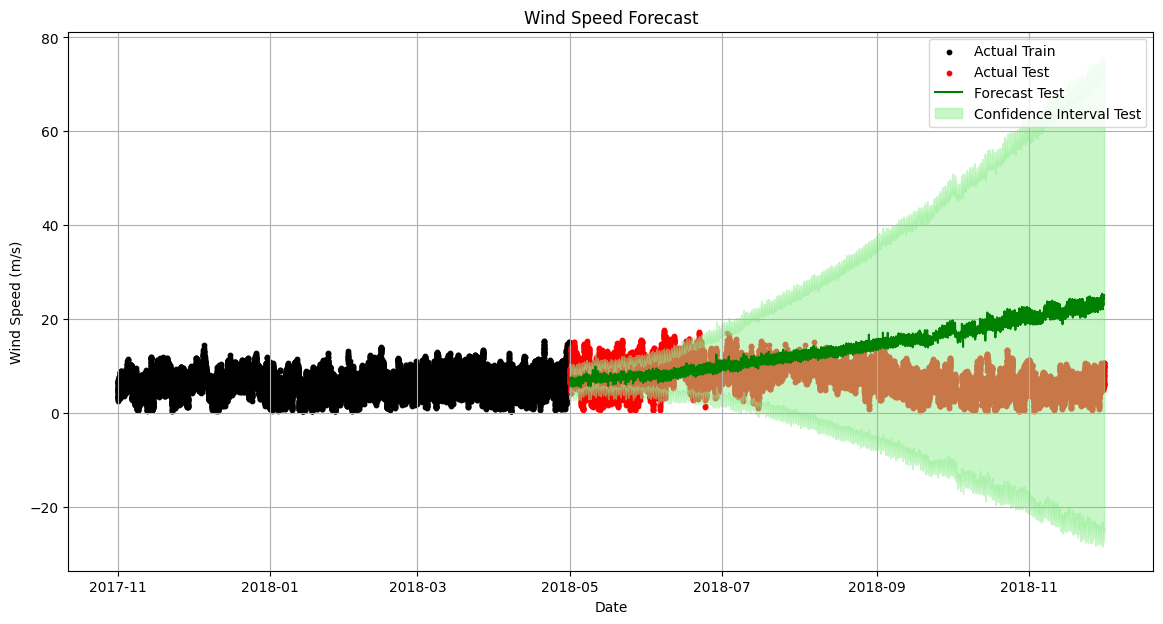

In [3]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = pd.read_csv('../excels/2017-2018-clean.csv', parse_dates=['Date/Time'])

# Drop rows with NaN values
df = df.dropna()

# Rename columns for Prophet
df.rename(columns={
    'Date/Time': 'ds',
    '100m_N Avg [m/s]': 'y',
    '100m_N Std [m/s]': '100m_N_Std',
    'Pressure [mbar]': 'Pressure',
    '98m WV [°]': 'WV_98m',
    '78m WV [°]': 'WV_78m',
    '48m WV [°]': 'WV_48m',
    'Temp 5m [°C]': 'Temp_5m',
    'Hum 5m [%]': 'Hum_5m'
}, inplace=True)

# Define seasons
def assign_season(date):
    month = date.month
    if month in [6, 7, 8]:
        return 'Monsoon'
    elif month in [9, 10, 11]:
        return 'Autumn'
    elif month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    else:
        return 'Unknown'

df['Season'] = df['ds'].apply(assign_season)

# Split data into training (first 6 months) and testing (last 6 months) periods
train_df = df[df['ds'] < '2018-05-01']
test_df = df[df['ds'] >= '2018-05-01']

# Prepare the data for Prophet
prophet_model = Prophet()
prophet_model.add_regressor('Pressure')
prophet_model.add_regressor('WV_98m')
prophet_model.add_regressor('WV_78m')
prophet_model.add_regressor('WV_48m')
prophet_model.add_regressor('Temp_5m')
prophet_model.add_regressor('Hum_5m')

# Fit the Prophet model
prophet_model.fit(train_df)

# Make predictions on the test dataset
forecast_test = prophet_model.predict(test_df)

# Calculate accuracy metrics
y_true = test_df['y']
y_pred = forecast_test['yhat']

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_true, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-Squared: {r_squared}")

# Plot the results
plt.figure(figsize=(14, 7))

# Plot actual train data
plt.scatter(train_df['ds'], train_df['y'], color='black', label='Actual Train', s=10)

# Plot actual test data
plt.scatter(test_df['ds'], test_df['y'], color='red', label='Actual Test', s=10)

# Plot forecasted test data
plt.plot(forecast_test['ds'], forecast_test['yhat'], color='green', label='Forecast Test')

# Plot confidence intervals
plt.fill_between(forecast_test['ds'], forecast_test['yhat_lower'], forecast_test['yhat_upper'], color='lightgreen', alpha=0.5, label='Confidence Interval Test')

# Add labels and legend
plt.title('Wind Speed Forecast')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.grid(True)
plt.show()


12:39:15 - cmdstanpy - INFO - Chain [1] start processing
12:41:00 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/1 [00:00<?, ?it/s]12:41:10 - cmdstanpy - INFO - Chain [1] start processing
12:41:58 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [01:11<00:00, 71.79s/it]


               horizon           mse        rmse         mae       mape  \
0      9 days 00:00:00      7.531001    2.744267    2.208070   0.396582   
1      9 days 00:10:00      7.557383    2.749069    2.211841   0.396970   
2      9 days 00:20:00      7.573900    2.752072    2.214092   0.397041   
3      9 days 00:30:00      7.580576    2.753285    2.215194   0.397017   
4      9 days 00:40:00      7.593742    2.755674    2.216938   0.396921   
...                ...           ...         ...         ...        ...   
11660 89 days 23:20:00  62502.683541  250.005367  249.934769  45.641506   
11661 89 days 23:30:00  62507.342513  250.014685  249.944344  45.636472   
11662 89 days 23:40:00  62512.194426  250.024388  249.954326  45.629304   
11663 89 days 23:50:00  62517.305260  250.034608  249.964866  45.617486   
11664 90 days 00:00:00  62522.808955  250.045614  249.976239  45.597871   

           mdape     smape  coverage  
0       0.346954  0.499704  0.645062  
1       0.347332  0.5

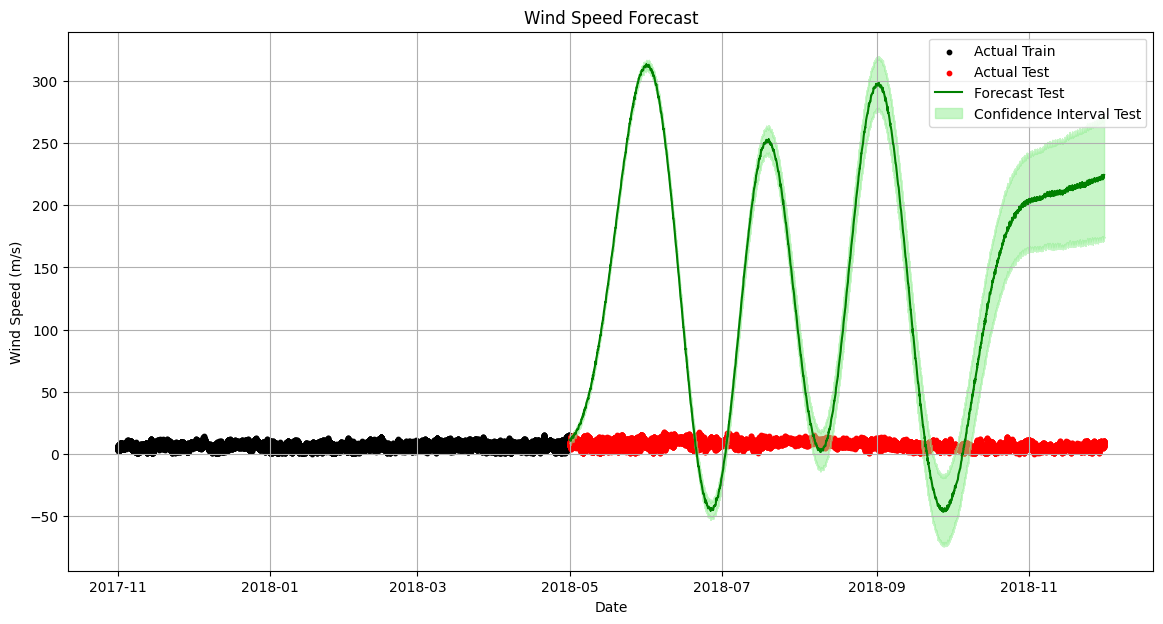

In [6]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = pd.read_csv('../excels/2017-2018-clean.csv', parse_dates=['Date/Time'])

# Drop rows with NaN values
df = df.dropna()

# Rename columns for Prophet
df.rename(columns={
    'Date/Time': 'ds',
    '100m_N Avg [m/s]': 'y',
    '100m_N Std [m/s]': '100m_N_Std',
    'Pressure [mbar]': 'Pressure',
    '98m WV [°]': 'WV_98m',
    '78m WV [°]': 'WV_78m',
    '48m WV [°]': 'WV_48m',
    'Temp 5m [°C]': 'Temp_5m',
    'Hum 5m [%]': 'Hum_5m'
}, inplace=True)

# Define seasons
def assign_season(date):
    month = date.month
    if month in [6, 7, 8]:
        return 'Monsoon'
    elif month in [9, 10, 11]:
        return 'Autumn'
    elif month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    else:
        return 'Unknown'

df['Season'] = df['ds'].apply(assign_season)

# Feature engineering: Add new features
df['day_of_week'] = df['ds'].dt.dayofweek
df['hour'] = df['ds'].dt.hour
df['month'] = df['ds'].dt.month

# Normalize the continuous features
scaler = StandardScaler()
df[['Pressure', 'WV_98m', 'WV_78m', 'WV_48m', 'Temp_5m', 'Hum_5m']] = scaler.fit_transform(df[['Pressure', 'WV_98m', 'WV_78m', 'WV_48m', 'Temp_5m', 'Hum_5m']])

# Split data into training (first 6 months) and testing (last 6 months) periods
train_df = df[df['ds'] < '2018-05-01']
test_df = df[df['ds'] >= '2018-05-01']

# Prepare the data for Prophet
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
prophet_model.add_regressor('Pressure')
prophet_model.add_regressor('WV_98m')
prophet_model.add_regressor('WV_78m')
prophet_model.add_regressor('WV_48m')
prophet_model.add_regressor('Temp_5m')
prophet_model.add_regressor('Hum_5m')
prophet_model.add_regressor('day_of_week')
prophet_model.add_regressor('hour')
prophet_model.add_regressor('month')

# Fit the Prophet model
prophet_model.fit(train_df)

# Cross-validation
df_cv = cross_validation(prophet_model, initial='90 days', period='30 days', horizon='90 days')
df_p = performance_metrics(df_cv)

print(df_p)

# Make predictions on the test dataset
forecast_test = prophet_model.predict(test_df)

# Calculate accuracy metrics
y_true = test_df['y']
y_pred = forecast_test['yhat']

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_true, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-Squared: {r_squared}")

# Plot the results
plt.figure(figsize=(14, 7))

# Plot actual train data
plt.scatter(train_df['ds'], train_df['y'], color='black', label='Actual Train', s=10)

# Plot actual test data
plt.scatter(test_df['ds'], test_df['y'], color='red', label='Actual Test', s=10)

# Plot forecasted test data
plt.plot(forecast_test['ds'], forecast_test['yhat'], color='green', label='Forecast Test')

# Plot confidence intervals
plt.fill_between(forecast_test['ds'], forecast_test['yhat_lower'], forecast_test['yhat_upper'], color='lightgreen', alpha=0.5, label='Confidence Interval Test')

# Add labels and legend
plt.title('Wind Speed Forecast')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# Data preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv("../excels/2017-2018-clean.csv")

# Clean data (handle missing values, outliers)
# Convert timestamp to datetime format
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

# Split data into features (X) and target variable (y)
X = data[['100m_N Std [m/s]', 'Pressure [mbar]', '98m WV [°]', '78m WV [°]', '48m WV [°]', 'Temp 5m [°C]', 'Hum 5m [%]']]
y = data['100m_N Avg [m/s]']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

# Model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predictions = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Model deployment: Use the trained model to make predictions on new data


Mean Absolute Error: 0.8831798674466659
Mean Squared Error: 1.4933409907607245
R-squared: 0.8011565222006789


14:27:50 - cmdstanpy - INFO - Chain [1] start processing
14:29:50 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



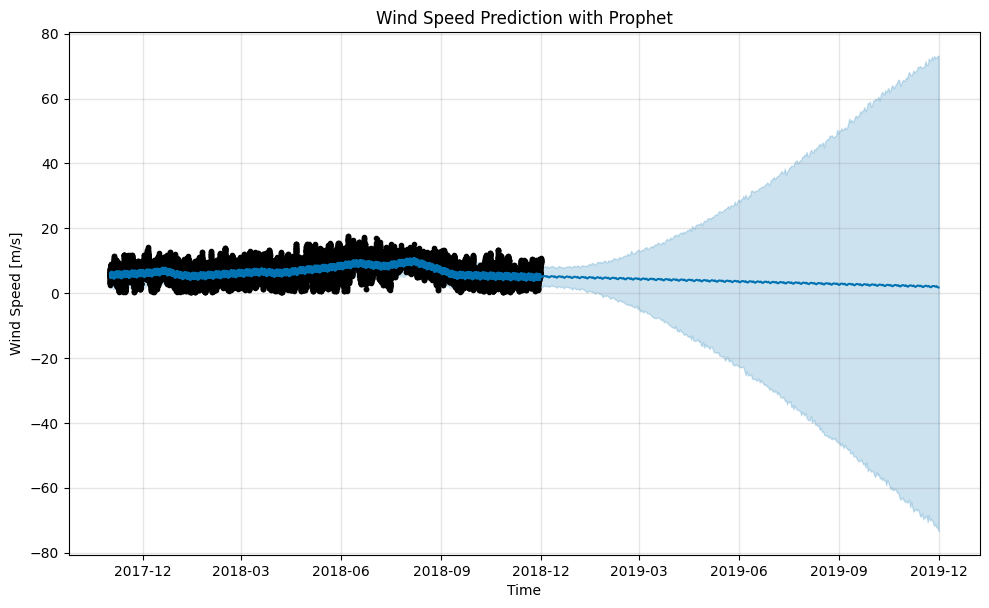

In [13]:
# Data preprocessing
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load data
data = pd.read_csv("../excels/2017-2018-clean.csv")

# Clean data (handle missing values, outliers)
# Convert timestamp to datetime format
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

# Rename columns for Prophet
data = data.rename(columns={"Date/Time": "ds", "100m_N Avg [m/s]": "y"})

# Model training
model = Prophet()
model.fit(data)

# Make future predictions
future = model.make_future_dataframe(periods=365)  # Predict for one year
forecast = model.predict(future)

# Visualize model predictions
fig = model.plot(forecast)
plt.xlabel('Time')
plt.ylabel('Wind Speed [m/s]')
plt.title('Wind Speed Prediction with Prophet')
plt.show()


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
632/632 - 29s - 45ms/step - loss: 16.7769 - val_loss: 6.0074
Epoch 2/50
632/632 - 8s - 12ms/step - loss: 4.9239 - val_loss: 4.2360
Epoch 3/50
632/632 - 9s - 14ms/step - loss: 4.0241 - val_loss: 3.8167
Epoch 4/50
632/632 - 6s - 9ms/step - loss: 3.7376 - val_loss: 3.6371
Epoch 5/50
632/632 - 5s - 8ms/step - loss: 3.5933 - val_loss: 3.5351
Epoch 6/50
632/632 - 7s - 11ms/step - loss: 3.5035 - val_loss: 3.4746
Epoch 7/50
632/632 - 9s - 13ms/step - loss: 3.4474 - val_loss: 3.4299
Epoch 8/50
632/632 - 6s - 10ms/step - loss: 3.4062 - val_loss: 3.3941
Epoch 9/50
632/632 - 10s - 15ms/step - loss: 3.3733 - val_loss: 3.3629
Epoch 10/50
632/632 - 7s - 11ms/step - loss: 3.3454 - val_loss: 3.3359
Epoch 11/50
632/632 - 9s - 14ms/step - loss: 3.3204 - val_loss: 3.3113
Epoch 12/50
632/632 - 6s - 10ms/step - loss: 3.2970 - val_loss: 3.2879
Epoch 13/50
632/632 - 5s - 8ms/step - loss: 3.2749 - val_loss: 3.2666
Epoch 14/50
632/632 - 6s - 10ms/step - loss: 3.2542 - val_loss: 3.2476
Epoch 15/50
632

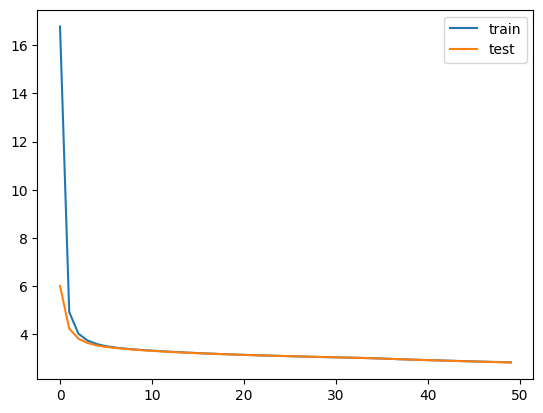

356/356 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step


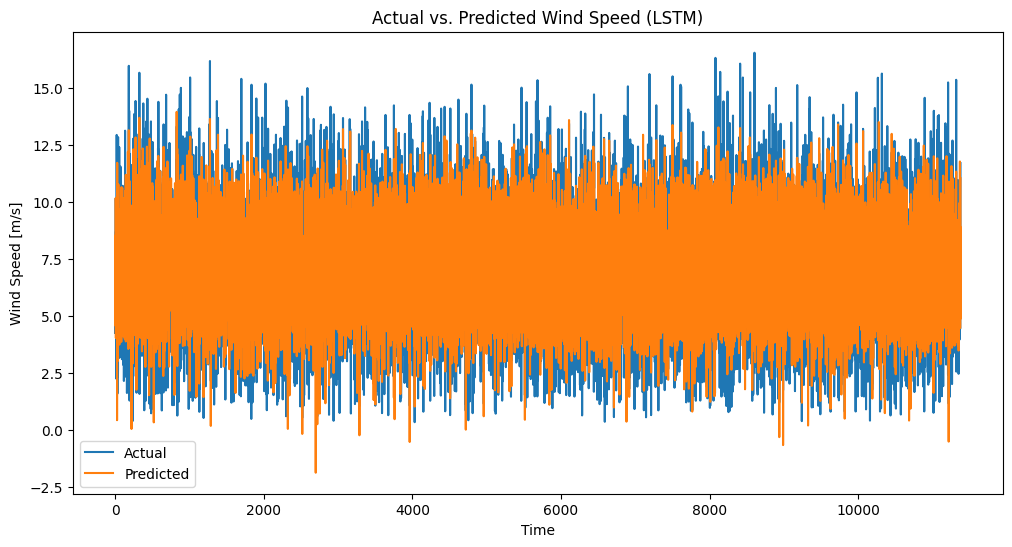

In [15]:
# Data preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("../excels/2017-2018-clean.csv")

# Clean data (handle missing values, outliers)
# Convert timestamp to datetime format
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

# Split data into features (X) and target variable (y)
X = data[['100m_N Std [m/s]', 'Pressure [mbar]', '98m WV [°]', '78m WV [°]', '48m WV [°]', 'Temp 5m [°C]', 'Hum 5m [%]']]
y = data['100m_N Avg [m/s]']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Model training
history = model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)

# Model evaluation
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Make predictions
y_pred = model.predict(X_test)

# Visualize model predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs. Predicted Wind Speed (LSTM)')
plt.xlabel('Time')
plt.ylabel('Wind Speed [m/s]')
plt.legend()
plt.show()


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 75s 22ms/step - loss: 0.0144
Epoch 2/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - loss: 0.0013
Epoch 3/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - loss: 0.0011
Epoch 4/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - loss: 0.0011
Epoch 5/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - loss: 0.0011
Epoch 6/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - loss: 0.0011
Epoch 7/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - loss: 0.0011
Epoch 8/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - loss: 0.0011
Epoch 9/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 55s 33ms/step - loss: 0.0011
Epoch 10/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 99s 43ms/step - loss: 0.0010
Epoch 11/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 44s 31ms/step - loss: 0.0011
Epoch 12/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 77s 26ms/step - loss: 0.0011
Epoch 13/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - loss: 0.0010
Epoch 14/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 45s 27ms/step - loss: 0.0010
E

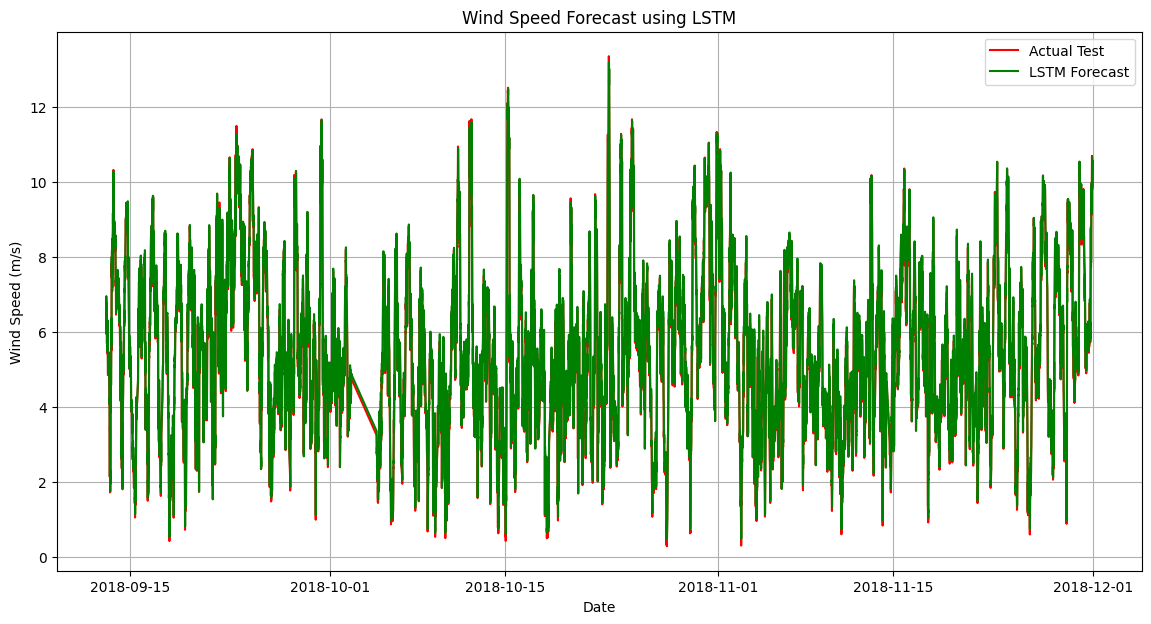

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = pd.read_csv('../excels/2017-2018-clean.csv', parse_dates=['Date/Time'])

# Drop rows with NaN values
df = df.dropna()

# Prepare the data
df['ds'] = pd.to_datetime(df['Date/Time'])
df.set_index('ds', inplace=True)
data = df['100m_N Avg [m/s]'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Split data into training (first 6 months) and testing (last 6 months) periods
train_size = int(len(data_normalized) * 0.8)
train_data, test_data = data_normalized[:train_size], data_normalized[train_size:]

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Sequence length
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape data for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate accuracy metrics
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test_inv, y_pred_inv)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-Squared: {r_squared}")

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[train_size+seq_length:], y_test_inv, label='Actual Test', color='red')
plt.plot(df.index[train_size+seq_length:], y_pred_inv, label='LSTM Forecast', color='green')
plt.title('Wind Speed Forecast using LSTM')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.layers import LSTM, Dense, Input, concatenate
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Load and preprocess the dataset with additional features
def load_and_process_data(csv_file):
    df = pd.read_csv(csv_file, parse_dates=['Date/Time'])
    df = df.dropna()
    df['ds'] = pd.to_datetime(df['Date/Time'])
    df.set_index('ds', inplace=True)
    
    # Selecting relevant columns
    selected_columns = ['100m_N Avg [m/s]', '100m_N Std [m/s]', 'Pressure [mbar]', 
                        '98m WV [°]', '78m WV [°]', '48m WV [°]', 'Temp 5m [°C]', 'Hum 5m [%]']
    
    data = df[selected_columns].values
    scaler = MinMaxScaler()
    data_normalized = scaler.fit_transform(data)
    return df, data_normalized, scaler

# Function to create the LSTM model
def create_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    lstm = LSTM(units=50, activation='relu')(inputs)
    outputs = Dense(1)(lstm)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Load and process the first dataset (2017-2018)
df_1718, data_normalized_1718, scaler_1718 = load_and_process_data('../excels/2017-2018-clean.csv')
train_size_1718 = int(len(data_normalized_1718) * 0.8)
train_data_1718, test_data_1718 = data_normalized_1718[:train_size_1718], data_normalized_1718[train_size_1718:]
seq_length = 10  # Sequence length
X_train_1718, y_train_1718 = create_sequences(train_data_1718, seq_length)
X_test_1718, y_test_1718 = create_sequences(test_data_1718, seq_length)

# Reshaping input data to include additional features
X_train_1718 = X_train_1718.reshape(X_train_1718.shape[0], X_train_1718.shape[1], X_train_1718.shape[2])
X_test_1718 = X_test_1718.reshape(X_test_1718.shape[0], X_test_1718.shape[1], X_test_1718.shape[2])

# Create LSTM model
model_1718 = create_lstm_model(input_shape=(seq_length, X_train_1718.shape[2]))

# Train the LSTM model for 2017-2018 dataset
history_1718 = model_1718.fit(X_train_1718, y_train_1718, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the LSTM model for 2017-2018 dataset
y_pred_1718 = model_1718.predict(X_test_1718)
y_pred_inv_1718 = scaler_1718.inverse_transform(y_pred_1718)
y_test_inv_1718 = scaler_1718.inverse_transform(y_test_1718.reshape(-1, 1))
mae_1718 = mean_absolute_error(y_test_inv_1718, y_pred_inv_1718)
mse_1718 = mean_squared_error(y_test_inv_1718, y_pred_inv_1718)
rmse_1718 = np.sqrt(mse_1718)
r_squared_1718 = r2_score(y_test_inv_1718, y_pred_inv_1718)
mape_1718 = np.mean(np.abs((y_test_inv_1718 - y_pred_inv_1718) / y_test_inv_1718)) * 100

print("2017-2018 Data Metrics:")
print(f"MAE: {mae_1718}")
print(f"MSE: {mse_1718}")
print(f"RMSE: {rmse_1718}")
print(f"R-Squared: {r_squared_1718}")
print(f"MAPE: {mape_1718}%")

# Plot training and validation loss for 2017-2018 dataset
plt.figure(figsize=(10, 6))
plt.plot(history_1718.history['loss'], label='Train Loss')
plt.plot(history_1718.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (2017-2018 Data)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot the results for 2017-2018 dataset
plt.figure(figsize=(14, 7))
plt.plot(df_1718.index[train_size_1718+seq_length:], y_test_inv_1718, label='Actual Test', color='red')
plt.plot(df_1718.index[train_size_1718+seq_length:], y_pred_inv_1718, label='LSTM Forecast (2017-2018)', color='green')
plt.title('Wind Speed Forecast using LSTM (2017-2018 Data)')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/50
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0802 - val_loss: 0.0437
Epoch 2/50
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0664 - val_loss: 0.0437
Epoch 3/50
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0665 - val_loss: 0.0437
Epoch 4/50
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0660 - val_loss: 0.0438
Epoch 5/50
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0662 - val_loss: 0.0439
Epoch 6/50
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0663 - val_loss: 0.0436
Epoch 7/50
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0662 - val_loss: 0.0436
Epoch 8/50
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0662 - val_loss: 0.0436
Epoch 9/50
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0661 - val_loss: 0.0437
Epoch 10/50
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0661 - val_loss: 0.0436
Epoch 11/50
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0660 - val_loss: 0.0436
Epoch 12/50
1138/1138 ━━━━━━━━

ValueError: non-broadcastable output operand with shape (11366,1) doesn't match the broadcast shape (11366,8)

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Define selected features
selected_features = ['100m_N Avg [m/s]', 'Pressure [mbar]', '98m WV [°]', '78m WV [°]', '48m WV [°]', 'Temp 5m [°C]', 'Hum 5m [%]']

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Load and preprocess the dataset
def load_and_process_data(csv_file):
    df = pd.read_csv(csv_file, parse_dates=['Date/Time'])
    df = df.dropna()
    df['ds'] = pd.to_datetime(df['Date/Time'])
    df.set_index('ds', inplace=True)
    
    # Selecting relevant features for wind speed prediction
    data = df[selected_features].values
    scaler = MinMaxScaler()
    data_normalized = scaler.fit_transform(data)
    return df, data_normalized, scaler

# Load and process the dataset
df_1718, data_normalized_1718, scaler_1718 = load_and_process_data('../excels/2017-2018-clean.csv')
train_size_1718 = int(len(data_normalized_1718) * 0.8)
train_data_1718, test_data_1718 = data_normalized_1718[:train_size_1718], data_normalized_1718[train_size_1718:]
seq_length = 10  # Sequence length
X_train_1718, y_train_1718 = create_sequences(train_data_1718, seq_length)
X_test_1718, y_test_1718 = create_sequences(test_data_1718, seq_length)

# Define and train the LSTM model
model_1718 = Sequential([
    LSTM(units=50, activation='relu', input_shape=(X_train_1718.shape[1], X_train_1718.shape[2])),
    Dense(units=1)
])
model_1718.compile(optimizer='adam', loss='mean_squared_error')
model_1718.fit(X_train_1718, y_train_1718, epochs=50, batch_size=32)

# Save the trained model
model_1718.save('models/lstm_wind_speed_model_feature_1718.h5')

# Evaluate the LSTM model for 2017-2018 dataset
# Load the saved model
model_1718 = load_model('models/lstm_wind_speed_model_feature_1718.h5')

# Predict on test data
y_pred_1718 = model_1718.predict(X_test_1718)

# Create a dummy array with the same shape as the original data
dummy_array = np.zeros((y_pred_1718.shape[0], 7))
dummy_array[:, 0] = y_pred_1718.reshape(-1)

# Inverse transform the dummy array
y_pred_inv_1718 = scaler_1718.inverse_transform(dummy_array)[:, 0]

# Repeat the same process for y_test_1718
dummy_array = np.zeros((y_test_1718.shape[0], 7))
dummy_array[:, 0] = y_test_1718.reshape(-1)
y_test_inv_1718 = scaler_1718.inverse_transform(dummy_array)[:, 0]

# Compute metrics
mae_1718 = mean_absolute_error(y_test_inv_1718, y_pred_inv_1718)
mse_1718 = mean_squared_error(y_test_inv_1718, y_pred_inv_1718)
rmse_1718 = np.sqrt(mse_1718)
r_squared_1718 = r2_score(y_test_inv_1718, y_pred_inv_1718)
mape_1718 = np.mean(np.abs((y_test_inv_1718 - y_pred_inv_1718) / y_test_inv_1718)) * 100

print("2017-2018 Data Metrics:")
print(f"MAE: {mae_1718}")
print(f"MSE: {mse_1718}")
print(f"RMSE: {rmse_1718}")
print(f"R-Squared: {r_squared_1718}")
print(f"MAPE: {mape_1718}%")

# Plot the results for 2017-2018 dataset
plt.figure(figsize=(14, 7))
plt.plot(df_1718.index[seq_length+len(train_data_1718):], y_test_inv_1718, label='Actual Test', color='red')
plt.plot(df_1718.index[seq_length+len(train_data_1718):], y_pred_inv_1718, label='LSTM Forecast (2017-2018)', color='green')
plt.title('Wind Speed Forecast using LSTM (2017-2018 Data)')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/50


c:\Users\jagad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1422/1422 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0512
Epoch 2/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0456
Epoch 3/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0452
Epoch 4/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0454
Epoch 5/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0454
Epoch 6/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0450
Epoch 7/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0451
Epoch 8/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0449
Epoch 9/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0453
Epoch 10/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0450
Epoch 11/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0454
Epoch 12/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0453
Epoch 13/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0452
Epoch 14/50
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0451
Epoch 15/50
1422/1422 ━━━━━━━━━━━━━━━━━━

356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


ValueError: could not broadcast input array from shape (79562,) into shape (11366,)

In [16]:
# Load the saved model
model_1718 = load_model('models/lstm_wind_speed_model_feature_1718.h5')

# Predict on test data
y_pred_1718 = model_1718.predict(X_test_1718)

# Create a dummy array with the same shape as the original data
dummy_array = np.zeros((y_pred_1718.shape[0], 7))
dummy_array[:, 0] = y_pred_1718.reshape(-1)

# Inverse transform the dummy array
y_pred_inv_1718 = scaler_1718.inverse_transform(dummy_array)[:, 0]

# Repeat the same process for y_test_1718
dummy_array = np.zeros((y_test_1718.shape[0], 7))
dummy_array[:, 0] = y_test_1718.reshape(-1)
y_test_inv_1718 = scaler_1718.inverse_transform(dummy_array)[:, 0]

# Check the shape of y_test_1718
print(y_test_1718.shape)

# Check the shape of dummy_array
print(dummy_array.shape)

# Compute metrics
mae_1718 = mean_absolute_error(y_test_inv_1718, y_pred_inv_1718)
mse_1718 = mean_squared_error(y_test_inv_1718, y_pred_inv_1718)
rmse_1718 = np.sqrt(mse_1718)
r_squared_1718 = r2_score(y_test_inv_1718, y_pred_inv_1718)
mape_1718 = np.mean(np.abs((y_test_inv_1718 - y_pred_inv_1718) / y_test_inv_1718)) * 100

print("2017-2018 Data Metrics:")
print(f"MAE: {mae_1718}")
print(f"MSE: {mse_1718}")
print(f"RMSE: {rmse_1718}")
print(f"R-Squared: {r_squared_1718}")
print(f"MAPE: {mape_1718}%")

# Plot the results for 2017-2018 dataset
plt.figure(figsize=(14, 7))
plt.plot(df_1718.index[seq_length+len(train_data_1718):], y_test_inv_1718, label='Actual Test', color='red')
plt.plot(df_1718.index[seq_length+len(train_data_1718):], y_pred_inv_1718, label='LSTM Forecast (2017-2018)', color='green')
plt.title('Wind Speed Forecast using LSTM (2017-2018 Data)')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.grid(True)
plt.show()

356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


ValueError: could not broadcast input array from shape (79562,) into shape (11366,)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import load_model

# Assuming scaler_1718 is your scaler used during preprocessing
# and X_test_1718, y_test_1718 are your test data and true labels

# Load the saved model
model_1718 = load_model('models/lstm_wind_speed_model_feature_1718.h5')

# Predict on test data
# Predict on test data
# Predict on test data
y_pred_1718 = model_1718.predict(X_test_1718)

# Check the shape of y_pred_1718 immediately after prediction
print("Shape of y_pred_1718 before reshape:", y_pred_1718.shape)

# Reshape y_pred_1718 if necessary
if y_pred_1718.shape[-1] != 7:
    raise ValueError("Unexpected shape for y_pred_1718. Expected (n_samples, 7)")

# Inverse transform predictions and true labels
y_pred_inv_1718 = scaler_1718.inverse_transform(y_pred_1718)
y_test_inv_1718 = scaler_1718.inverse_transform(y_test_1718)

# Assuming y_test_1718 is already in the correct shape (n_samples, 7)
# Reshape to (n_samples,) if needed for metrics and plotting
y_pred_inv_1718 = y_pred_inv_1718[:, 0]  # Assuming your original data structure
y_test_inv_1718 = y_test_inv_1718[:, 0] # Assuming your original data structure

# Compute metrics
mae_1718 = mean_absolute_error(y_test_inv_1718, y_pred_inv_1718)
mse_1718 = mean_squared_error(y_test_inv_1718, y_pred_inv_1718)
rmse_1718 = np.sqrt(mse_1718)
r_squared_1718 = r2_score(y_test_inv_1718, y_pred_inv_1718)
mape_1718 = np.mean(np.abs((y_test_inv_1718 - y_pred_inv_1718) / y_test_inv_1718)) * 100

# Print metrics
print("2017-2018 Data Metrics:")
print(f"MAE: {mae_1718}")
print(f"MSE: {mse_1718}")
print(f"RMSE: {rmse_1718}")
print(f"R-Squared: {r_squared_1718}")
print(f"MAPE: {mape_1718}%")

# Plot the results for 2017-2018 dataset
plt.figure(figsize=(14, 7))
plt.plot(df_1718.index[seq_length+len(train_data_1718):], y_test_inv_1718, label='Actual Test', color='red')
plt.plot(df_1718.index[seq_length+len(train_data_1718):], y_pred_inv_1718, label='LSTM Forecast (2017-2018)', color='green')
plt.title('Wind Speed Forecast using LSTM (2017-2018 Data)')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.grid(True)
plt.show()


356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Shape of y_pred_1718 before reshape: (11366, 1)


ValueError: Unexpected shape for y_pred_1718. Expected (n_samples, 7)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load and preprocess your dataset
# Assuming df contains your dataset with columns including 'Date/Time', '100m_N Avg [m/s]', etc.

# Define your features and target
features = ['100m_N Avg [m/s]', '100m_N Std [m/s]', 'Pressure [mbar]', '98m WV [°]', '78m WV [°]', '48m WV [°]', 'Temp 5m [°C]', 'Hum 5m [%]']
target = '100m_N Avg [m/s]'

# Extract features and target
X = df[features].values
y = df[target].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

# Split data into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X_scaled[0:train_size], X_scaled[train_size:len(X)]
y_train, y_test = y_scaled[0:train_size], y_scaled[train_size:len(y)]

# Prepare sequences (e.g., using past 10 time steps)
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10  # number of past time steps to use for prediction
X_train, y_train = create_sequences(X_train, y_train, time_steps)
X_test, y_test = create_sequences(X_test, y_test, time_steps)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

# Predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and true labels
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Compute metrics
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

# Print metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-Squared: {r2}")
print(f"MAPE: {mape}%")

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual Test', color='red')
plt.plot(y_pred_inv, label='LSTM Forecast', color='green')
plt.title('Wind Speed Forecast using LSTM')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.grid(True)
plt.show()


c:\Users\jagad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0043 - val_loss: 0.0016
Epoch 2/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 3/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 4/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 5/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 6/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 7/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 9.8017e-04 - val_loss: 0.0014
Epoch 8/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 9.9013e-04 - val_loss: 0.0014
Epoch 9/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 9.7633e-04 - val_loss: 0.0013
Epoch 10/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 9.6994e-04 - val_loss: 0.0013
Epoch 11/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 9.6724e-04 - val_loss: 0.0014
Epoch 12/

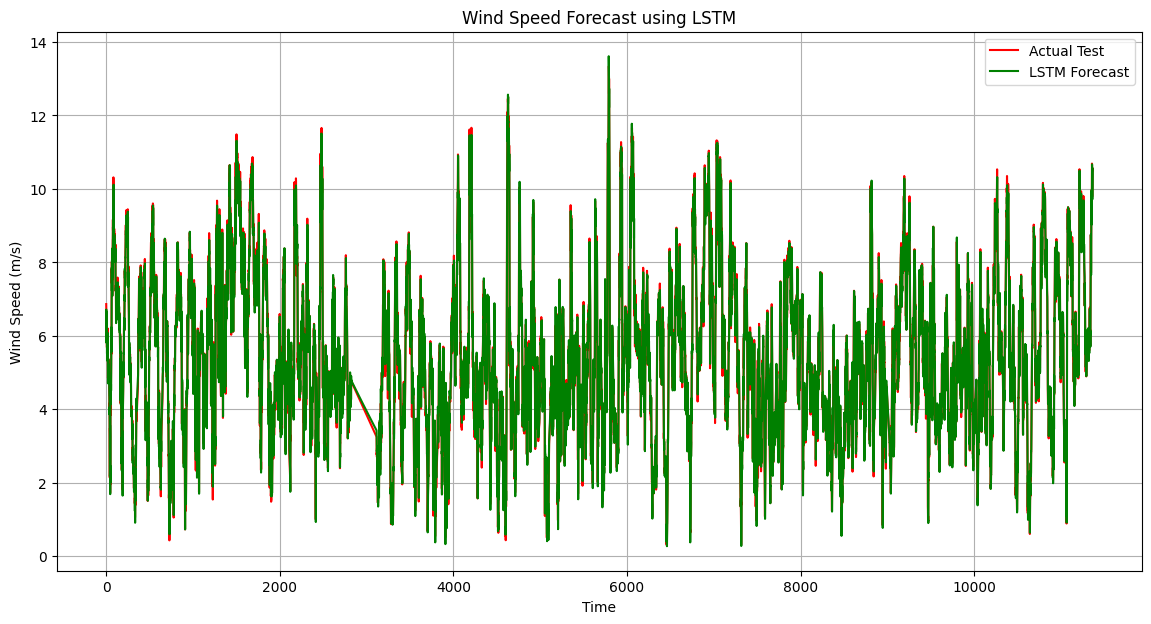

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load your dataset (replace with actual data loading code)
# Assuming df contains your dataset with columns including 'Date/Time', '100m_N Avg [m/s]', etc.
# Replace this with your actual data loading process
df = pd.read_csv('../excels/2017-2018-clean.csv')

# Define your features and target
features = ['Date/Time', '100m_N Avg [m/s]', '100m_N Std [m/s]', 'Pressure [mbar]', '98m WV [°]', '78m WV [°]', '48m WV [°]', 'Temp 5m [°C]', 'Hum 5m [%]']
target = '100m_N Avg [m/s]'

# Extract features and target
X = df[features].values
y = df[target].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X[:, 1:])  # Exclude 'Date/Time' from normalization
y_scaled = scaler.fit_transform(y)

# Split data into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X_scaled[0:train_size], X_scaled[train_size:len(X)]
y_train, y_test = y_scaled[0:train_size], y_scaled[train_size:len(y)]

# Prepare sequences (e.g., using past 10 time steps)
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10  # number of past time steps to use for prediction
X_train, y_train = create_sequences(X_train, y_train, time_steps)
X_test, y_test = create_sequences(X_test, y_test, time_steps)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

# Predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and true labels
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Compute metrics
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

# Print metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-Squared: {r2}")
print(f"MAPE: {mape}%")

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual Test', color='red')
plt.plot(y_pred_inv, label='LSTM Forecast', color='green')
plt.title('Wind Speed Forecast using LSTM')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/100


c:\Users\jagad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1280/1280 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0241 - val_loss: 0.0094
Epoch 2/100
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0154 - val_loss: 0.0091
Epoch 3/100
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0147 - val_loss: 0.0098
Epoch 4/100
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0141 - val_loss: 0.0102
Epoch 5/100
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0136 - val_loss: 0.0082
Epoch 6/100
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0130 - val_loss: 0.0111
Epoch 7/100
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0128 - val_loss: 0.0102
Epoch 8/100
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0125 - val_loss: 0.0092
Epoch 9/100
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0119 - val_loss: 0.0092
Epoch 10/100
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0120 - val_loss: 0.0101
Epoch 11/100
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0118 - val_loss: 0.0091
Epoch 12/100
1280/1280 ━━━━━━━━

356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 1.6371489428862598
MSE: 4.370949115480164
RMSE: 2.0906814954650943
R-Squared: 0.037878359869433775
MAPE: 40.823886843850275%


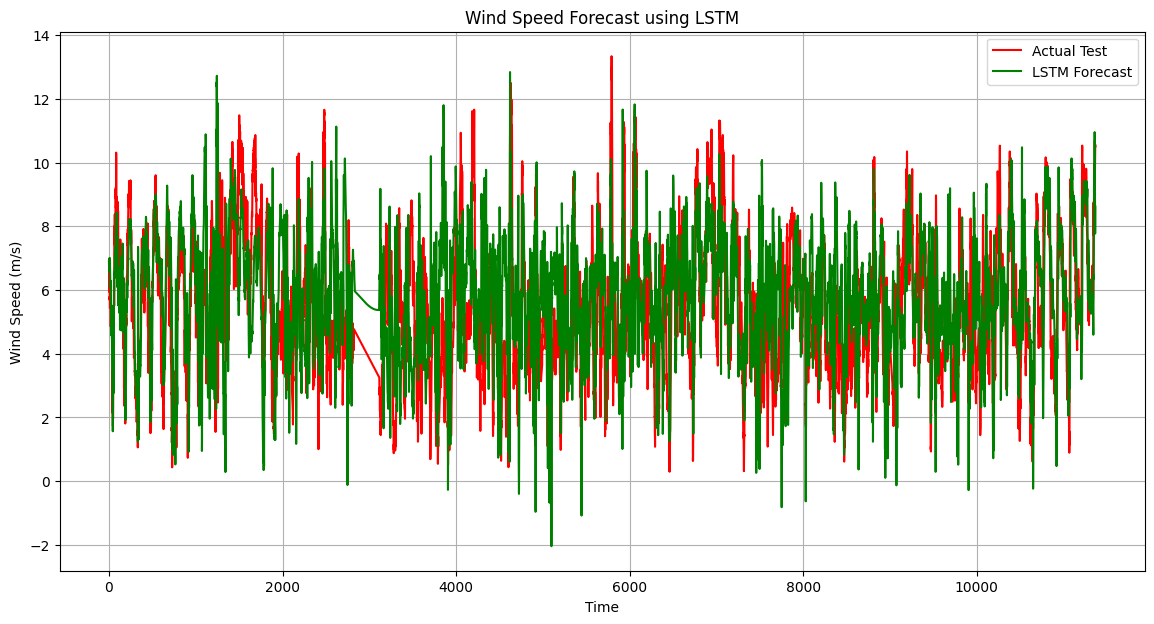

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load your dataset (replace with actual data loading code)
# Assuming df contains your dataset with columns including 'Date/Time', '100m_N Avg [m/s]', etc.
# Replace this with your actual data loading process
df = pd.read_csv('../excels/2017-2018-clean.csv')

# Define your features and target
features = ['Date/Time', 'Pressure [mbar]', '98m WV [°]', '78m WV [°]', '48m WV [°]', 'Temp 5m [°C]', 'Hum 5m [%]']
target = '100m_N Avg [m/s]'

# Extract features and target
X = df[features].values
y = df[target].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X[:, 1:])  # Exclude 'Date/Time' from normalization
y_scaled = scaler.fit_transform(y)

# Split data into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X_scaled[0:train_size], X_scaled[train_size:len(X)]
y_train, y_test = y_scaled[0:train_size], y_scaled[train_size:len(y)]

# Prepare sequences (e.g., using past 10 time steps)
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10  # number of past time steps to use for prediction
X_train, y_train = create_sequences(X_train, y_train, time_steps)
X_test, y_test = create_sequences(X_test, y_test, time_steps)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model without EarlyStopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Save the trained model to a file
model.save('lstm_model_feature_no_earlystopping.h5')

# Predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and true labels
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Compute metrics
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

# Print metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-Squared: {r2}")
print(f"MAPE: {mape}%")

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual Test', color='red')
plt.plot(y_pred_inv, label='LSTM Forecast', color='green')
plt.title('Wind Speed Forecast using LSTM')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/50


c:\Users\jagad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1280/1280 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0243 - val_loss: 0.0111
Epoch 2/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0159 - val_loss: 0.0108
Epoch 3/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0148 - val_loss: 0.0100
Epoch 4/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0141 - val_loss: 0.0089
Epoch 5/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0137 - val_loss: 0.0100
Epoch 6/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0128 - val_loss: 0.0101
Epoch 7/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0124 - val_loss: 0.0115
Epoch 8/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0119 - val_loss: 0.0098
Epoch 9/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0117 - val_loss: 0.0114
Epoch 10/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0114 - val_loss: 0.0147
Epoch 11/50
1280/1280 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0110 - val_loss: 0.0101
Epoch 12/50
1280/1280 ━━━━━━━━━━━━━━━━━━

356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
MAE: 1.5740609332019149
MSE: 3.967683410995935
RMSE: 1.9919044683407725
R-Squared: 0.12664412921519563
MAPE: 38.82092549761108%


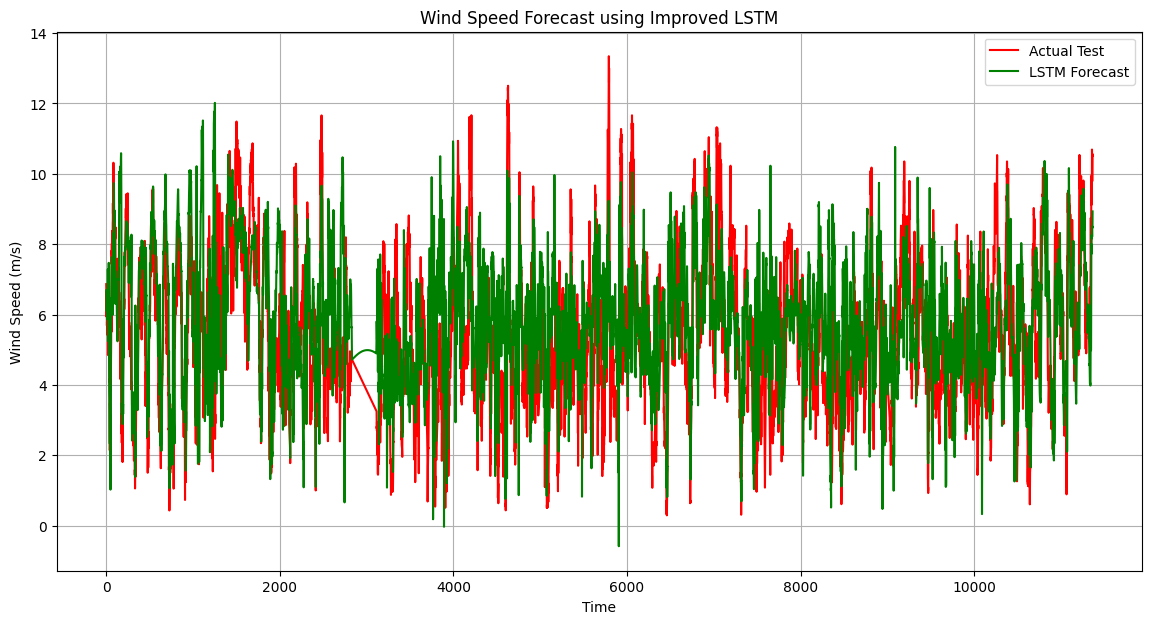

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load your dataset (replace with actual data loading code)
# Assuming df contains your dataset with columns including 'Date/Time', '100m_N Avg [m/s]', etc.
# Replace this with your actual data loading process
df = pd.read_csv('../excels/2017-2018-clean.csv')

# Define your features and target
features = ['Date/Time', 'Pressure [mbar]', '98m WV [°]', '78m WV [°]', '48m WV [°]', 'Temp 5m [°C]', 'Hum 5m [%]']
target = '100m_N Avg [m/s]'

# Extract features and target
X = df[features].values
y = df[target].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X[:, 1:])  # Exclude 'Date/Time' from normalization
y_scaled = scaler.fit_transform(y)

# Split data into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X_scaled[0:train_size], X_scaled[train_size:len(X)]
y_train, y_test = y_scaled[0:train_size], y_scaled[train_size:len(y)]

# Prepare sequences (e.g., using past 10 time steps)
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10  # number of past time steps to use for prediction
X_train, y_train = create_sequences(X_train, y_train, time_steps)
X_test, y_test = create_sequences(X_test, y_test, time_steps)

# Build LSTM model with increased complexity
model = Sequential()
model.add(LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Save the trained model to a file
model.save('lstm_model_improved.h5')

# Predictions
y_pred = model.predict(X_test)

# Inverse transform predictions and true labels
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Compute metrics
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

# Print metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-Squared: {r2}")
print(f"MAPE: {mape}%")

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual Test', color='red')
plt.plot(y_pred_inv, label='LSTM Forecast', color='green')
plt.title('Wind Speed Forecast using Improved LSTM')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.grid(True)
plt.show()
